# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.


The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3. Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

4. Recommend strategies to manage customer churn based on your observations.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
pd.set_option('display.max_columns',200)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler



from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#from xgboost import XGBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score,recall_score

sn.set_theme(style="darkgrid")
plt.style.use('ggplot')

# Data Understanding

In [74]:
telecom= pd.read_csv('train.csv')

In [3]:
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
telecom.shape

(69999, 172)

1. 69999 rows; 172 columns
2. Churn probability will be our target variable
3. we'll make id as index

In [75]:
telecom=telecom.set_index('id')

#dropping circle id as the datset is all about 109 circle.
telecom.drop(columns= ['circle_id'], inplace=True)

In [203]:
telecom.shape

(69999, 170)

In [204]:
telecom.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0

1. Few columns are there which do not have any variability , we'll drop those.
2. From the statistical describe method we can see there are many outliers present in the dataset, we would need to deal with that.
3. We can also see there are some missing values as well, eg-loc_og_t2o_mou, std_og_t2o_mou,etc
4. Datset has a large number of features but most of them are Integral values only, hence not much Data Preprocessing would be required.

# Data Cleaning and EDA

## Singleton Columns &  Missing Values Check

In [6]:
#BAckup
telecom_pca=telecom.copy()

In [76]:
# We'll extract all the columns that have only one unique value and drop those columns, as it won't be providing any variance 
# in the dataset and hence won't be helpful in modelling.
singleton=[]
for i in telecom.columns:
    if telecom[i].nunique()==1 :
        singleton.append(i)
        print(i,telecom[i].unique())
        
print(len(singleton))
telecom.drop(columns=singleton, inplace=True)  

loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
std_og_t2c_mou_6 [ 0. nan]
std_og_t2c_mou_7 [ 0. nan]
std_og_t2c_mou_8 [ 0. nan]
std_ic_t2o_mou_6 [ 0. nan]
std_ic_t2o_mou_7 [ 0. nan]
std_ic_t2o_mou_8 [ 0. nan]
12


In [8]:
print(' Shape After deleting above columns: ', telecom.shape)

 Shape After deleting above columns:  (69999, 158)


In [77]:
l=telecom.isnull().sum()
miss= dict(zip(telecom.columns,l))


# Dropping the columns ahving more tan 30 percent of the null value.
missing_50=dict([(i,miss[i]) for i in telecom.columns if miss[i]>0.3*telecom.shape[0]])
print('All columns having more than 30 Percent of the null values: ',len(missing_50), 'columns')
cols_to_drop=missing_50.keys()
telecom.drop(columns= cols_to_drop, inplace=True)

# <10 percent missing values cols:- checking for the singleton columns
missing_all=dict([(i,miss[i]) for i in telecom.columns if miss[i]>0])
cols= missing_all.keys()

#Unique values check in the columns having missing values
for i in cols:
    print(i,':  ',telecom[i].nunique(), 'unique values')


# After dropping , remaning columns that have missing values-
miss= dict(zip(telecom.columns,telecom.isnull().sum()))
missing_all=dict([(i,miss[i]) for i in telecom.columns if miss[i]>0])
cols= missing_all.keys()
print('After dropping , remaining columns that have missing values',len(cols))     


All columns having more than 30 Percent of the null values:  30 columns
onnet_mou_6 :   20057 unique values
onnet_mou_7 :   20076 unique values
onnet_mou_8 :   19725 unique values
offnet_mou_6 :   26254 unique values
offnet_mou_7 :   26139 unique values
offnet_mou_8 :   25995 unique values
roam_ic_mou_6 :   5306 unique values
roam_ic_mou_7 :   4240 unique values
roam_ic_mou_8 :   4252 unique values
roam_og_mou_6 :   6568 unique values
roam_og_mou_7 :   5305 unique values
roam_og_mou_8 :   5215 unique values
loc_og_t2t_mou_6 :   11491 unique values
loc_og_t2t_mou_7 :   11359 unique values
loc_og_t2t_mou_8 :   11296 unique values
loc_og_t2m_mou_6 :   17848 unique values
loc_og_t2m_mou_7 :   17641 unique values
loc_og_t2m_mou_8 :   17616 unique values
loc_og_t2f_mou_6 :   3376 unique values
loc_og_t2f_mou_7 :   3365 unique values
loc_og_t2f_mou_8 :   3311 unique values
loc_og_t2c_mou_6 :   1945 unique values
loc_og_t2c_mou_7 :   2103 unique values
loc_og_t2c_mou_8 :   2204 unique values
l

84 columns are still there which have missing values- we will try to impute them with either mean/median or a constant

In [10]:
telecom.shape

(69999, 128)

# Missing Value Imputation

### Categiorical Columns 

1. Out of 84 missing columns, we have some categorical columns as well. We'll first deal with these categorical columns (which should be datetime). 
2. After imputing the missing values with mode, we'll convert these columns into datetime.
3. We'll then use these datetime columns to get average duration to recharge in a 3 months time. This transformation may play important role in model building as higher the averae duration b/w recharges, higher will be the probability a customer has already churn.

In [78]:
# Replace the missing values for categorical columns with mode and then Changing the date time cols to date-
cat= telecom[cols].dtypes[telecom[cols].dtypes=='object']
print(cat)


m1= telecom['date_of_last_rech_6'].mode()[0]
m2= telecom['date_of_last_rech_7'].mode()[0]
m3= telecom['date_of_last_rech_8'].mode()[0]

telecom['date_of_last_rech_6']= telecom['date_of_last_rech_6'].fillna(m1)
telecom['date_of_last_rech_7']= telecom['date_of_last_rech_7'].fillna(m2)
telecom['date_of_last_rech_8']= telecom['date_of_last_rech_8'].fillna(m3)



telecom['date_of_last_rech_6']= pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7']= pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8']= pd.to_datetime(telecom['date_of_last_rech_8'])

a= telecom['date_of_last_rech_8'] - telecom['date_of_last_rech_7']
b= telecom['date_of_last_rech_7'] - telecom['date_of_last_rech_6']
telecom['Avg_rech_duration']= (a+b)/2

telecom['Avg_rech_duration']= pd.to_timedelta(telecom['Avg_rech_duration']).dt.days

telecom.drop(columns=['date_of_last_rech_8', 'date_of_last_rech_6','date_of_last_rech_7'],inplace=True)


date_of_last_rech_6    object
date_of_last_rech_7    object
date_of_last_rech_8    object
dtype: object


In [12]:
print(' Shape After deleting above columns: ', telecom.shape)

 Shape After deleting above columns:  (69999, 126)


### Numerical Columns

In [79]:
# Creating average number of times a recharge was done within 3 months. This transformation may be helpful during model building

telecom['Avg_rech_nTimes']=(telecom['total_rech_num_6'] + telecom['total_rech_num_7'] + telecom['total_rech_num_8'])/3
telecom['Avg_rech_nTimes']= round(telecom['Avg_rech_nTimes'],2)
telecom.drop(columns= ['total_rech_num_6' ,'total_rech_num_7' ,'total_rech_num_8'],inplace=True)

In [14]:
print(' Shape After deleting above columns: ', telecom.shape)

 Shape After deleting above columns:  (69999, 124)


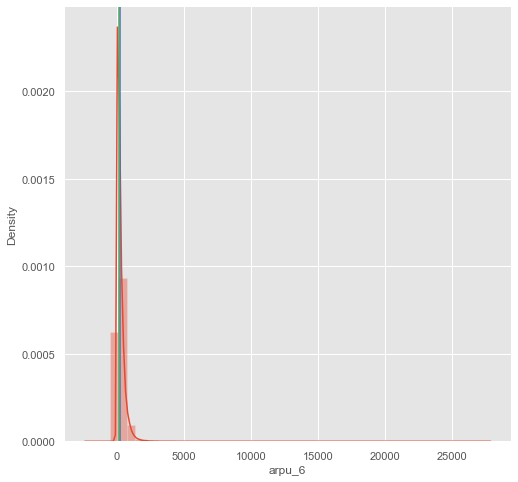

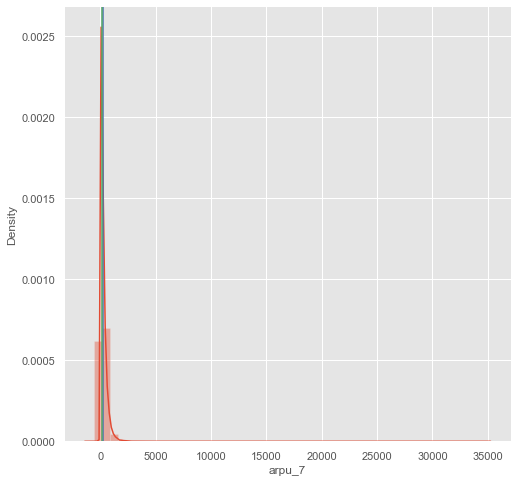

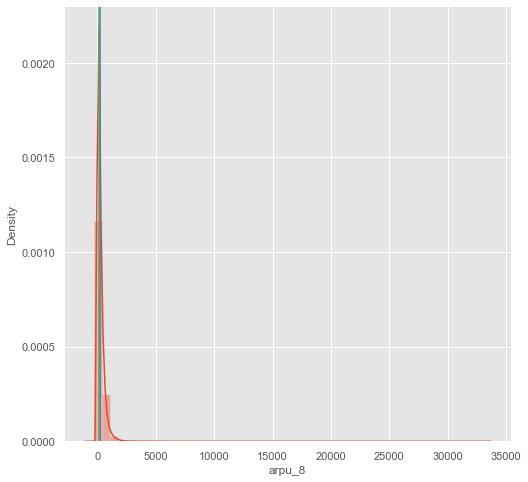

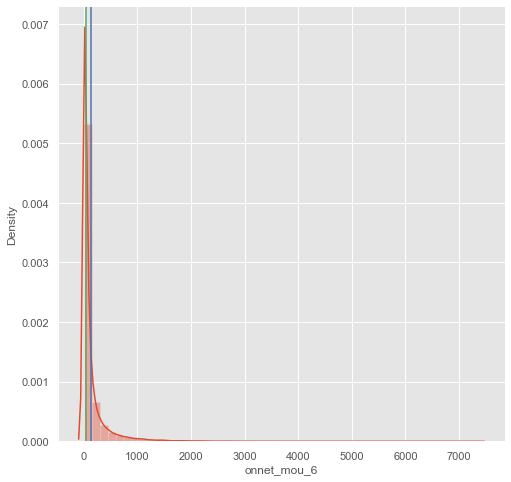

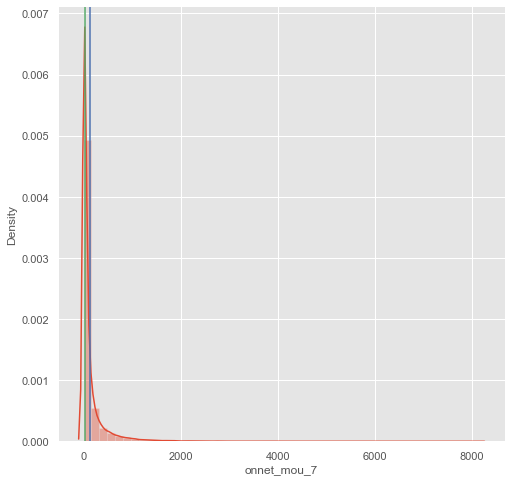

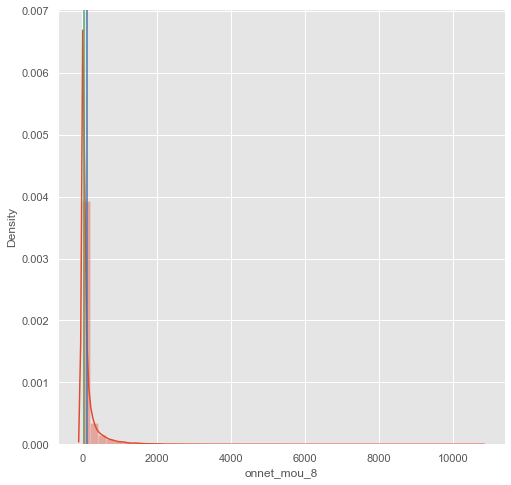

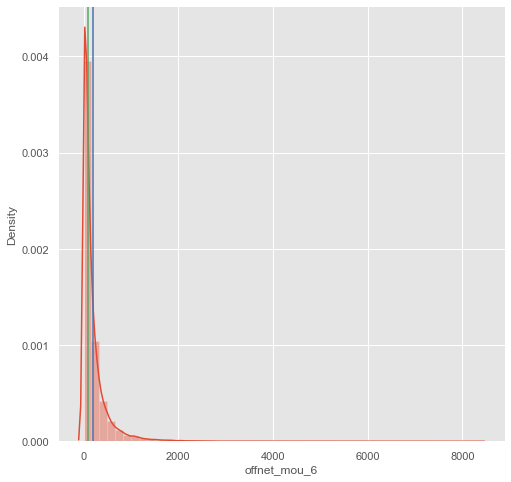

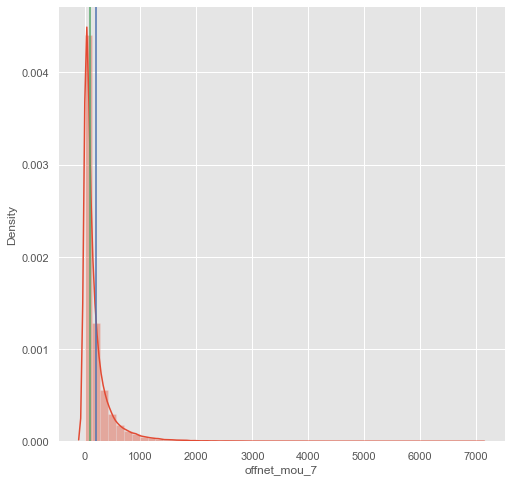

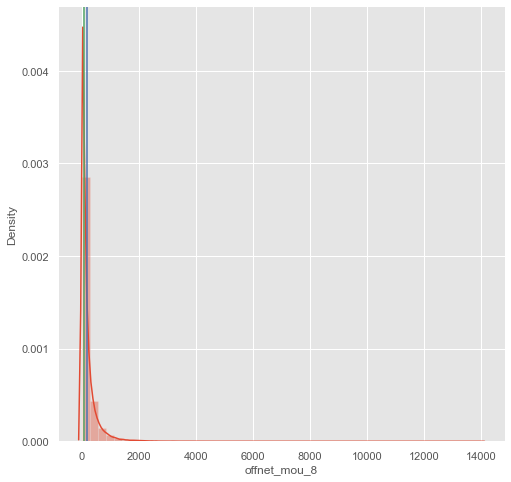

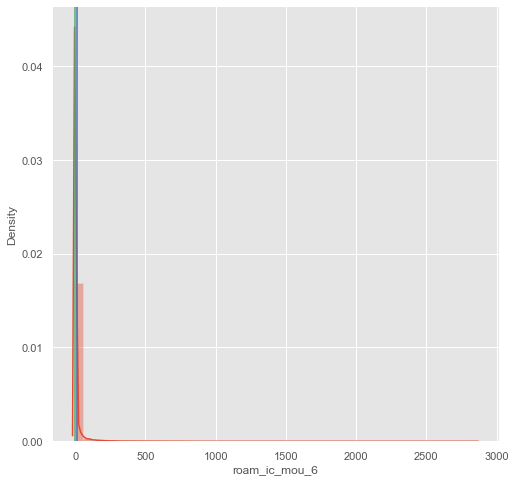

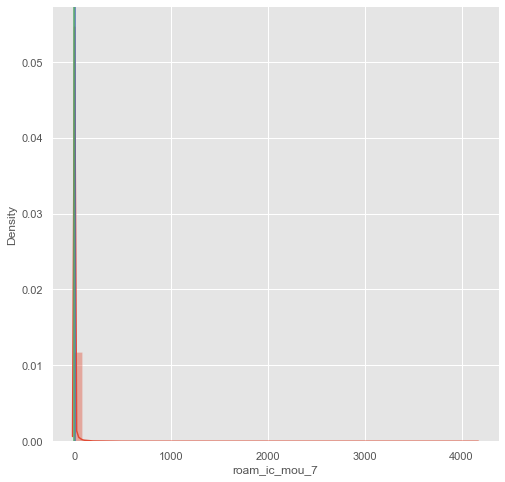

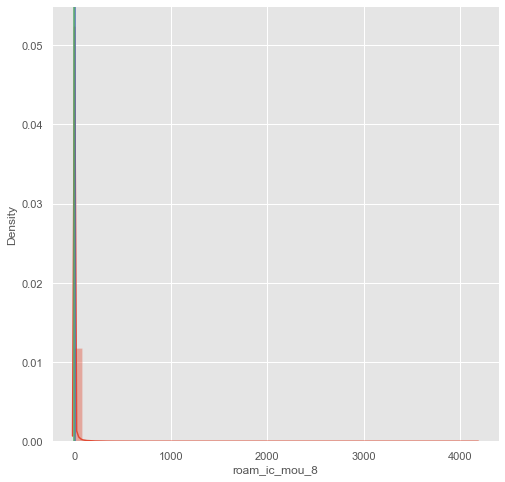

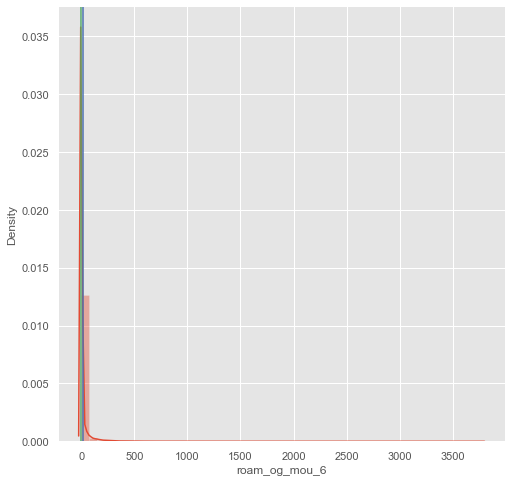

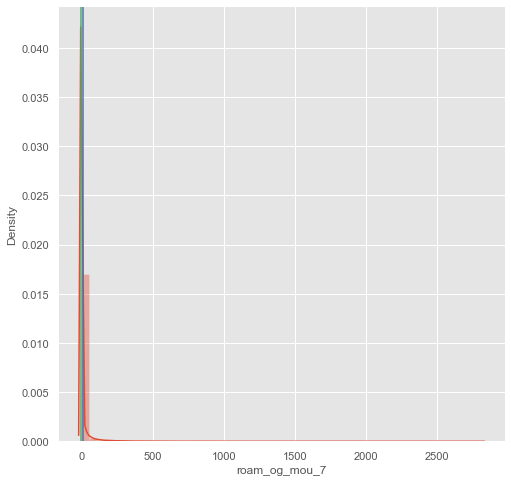

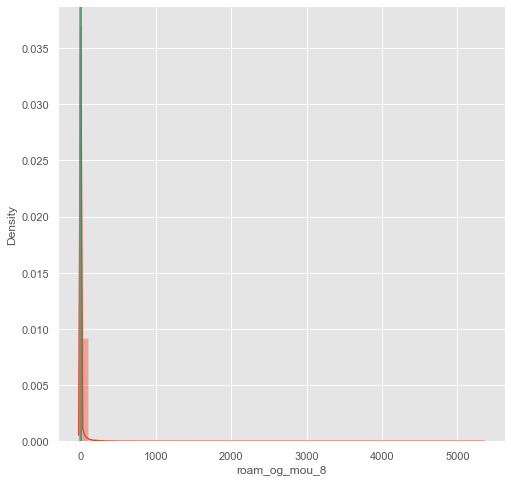

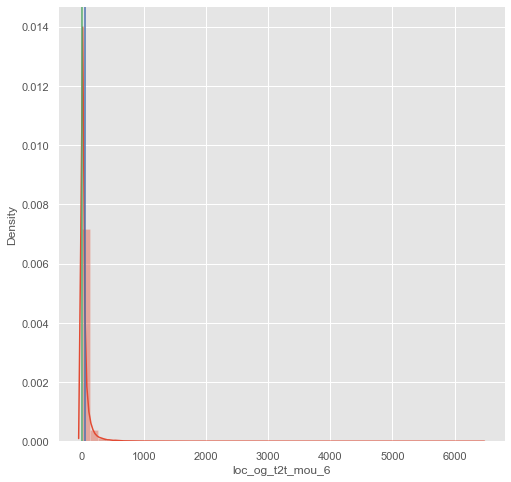

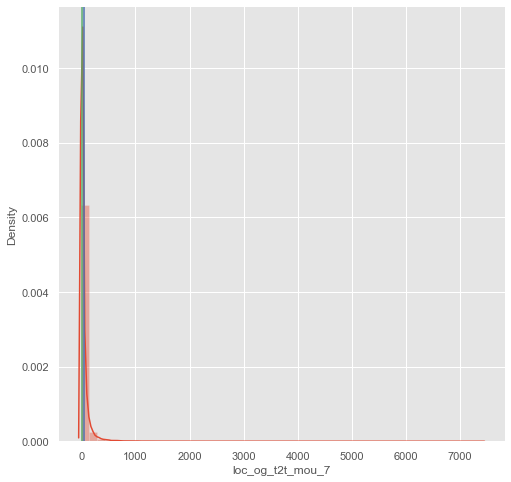

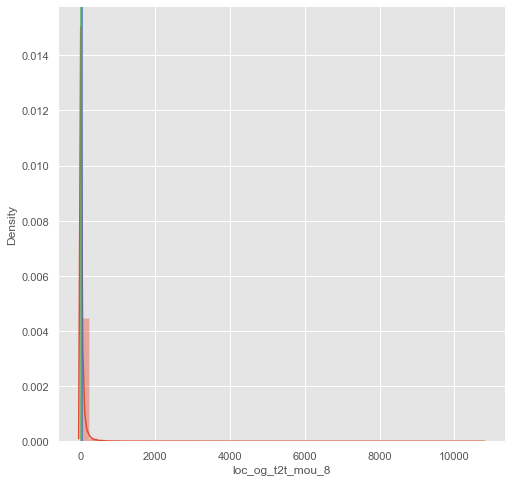

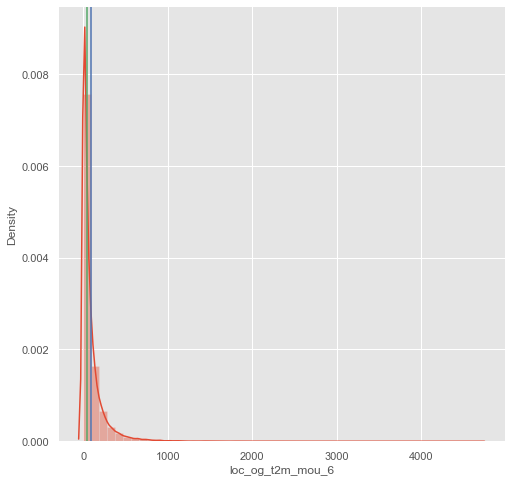

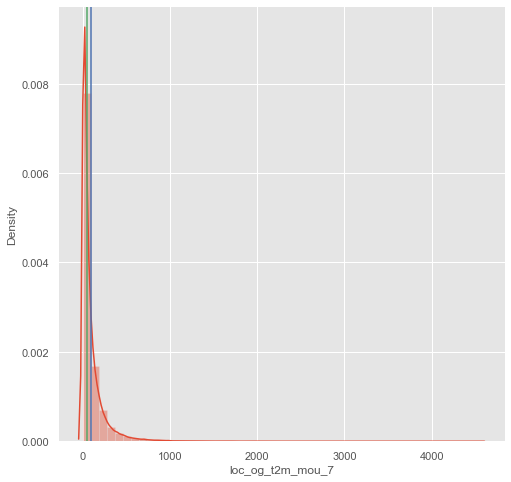

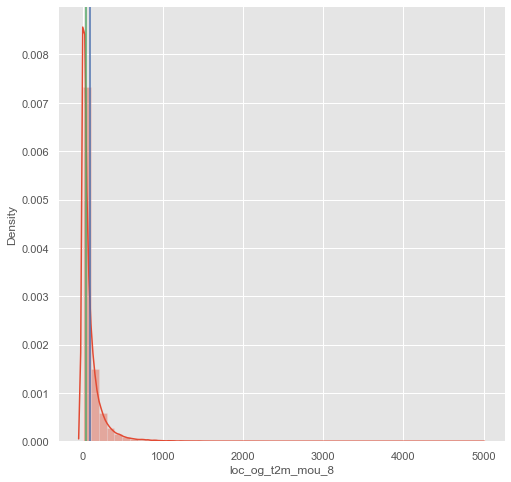

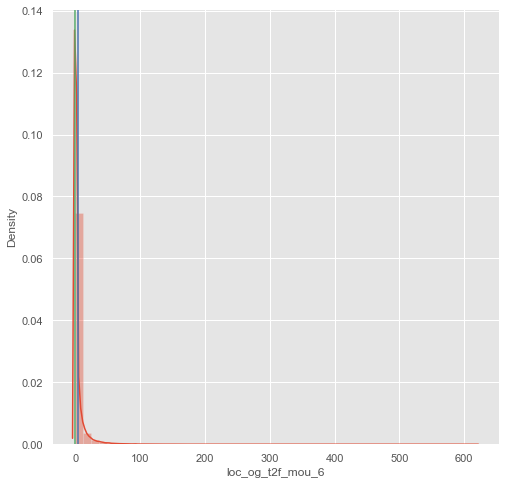

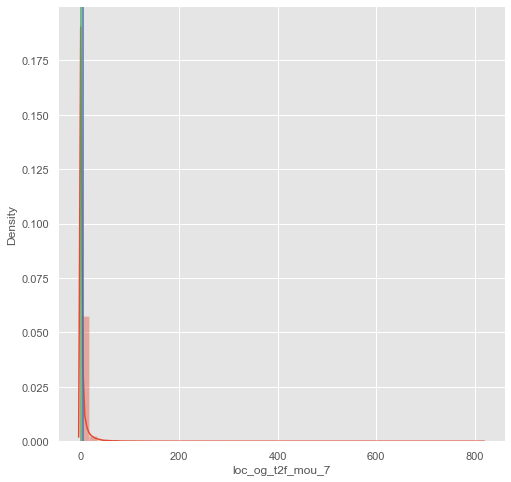

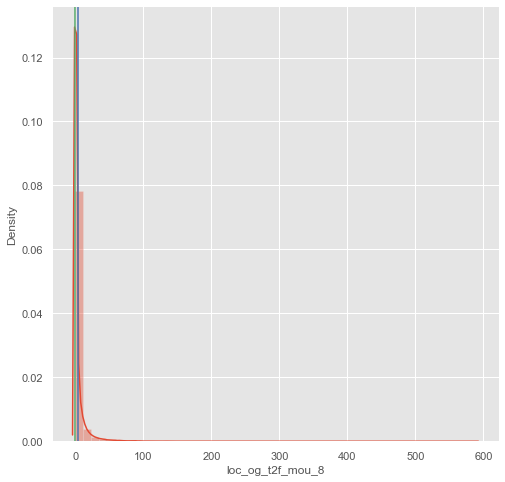

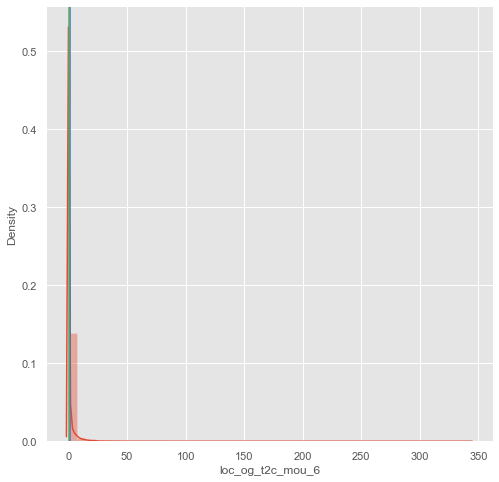

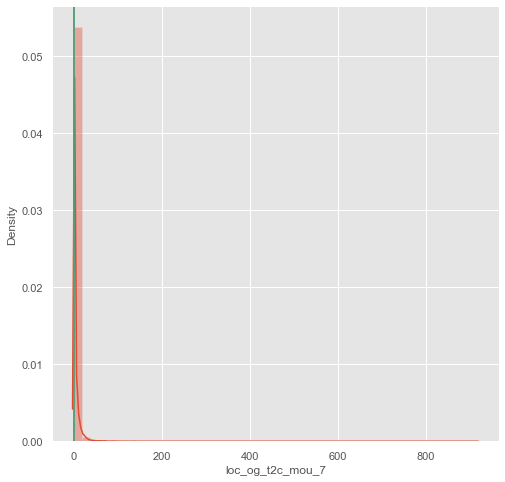

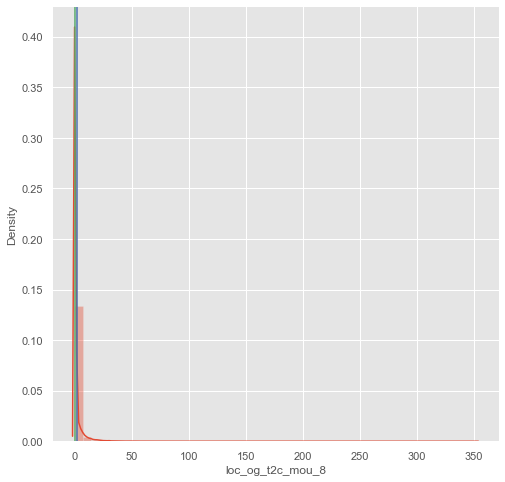

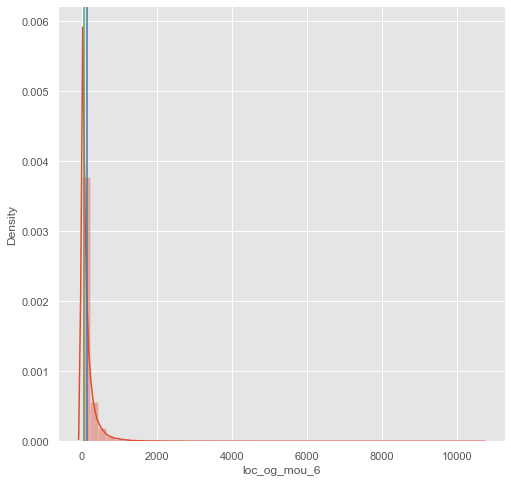

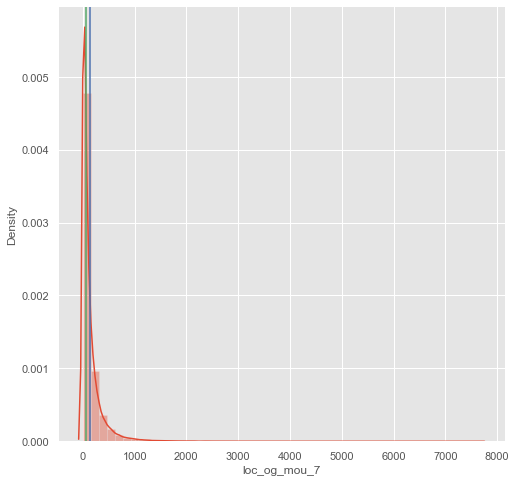

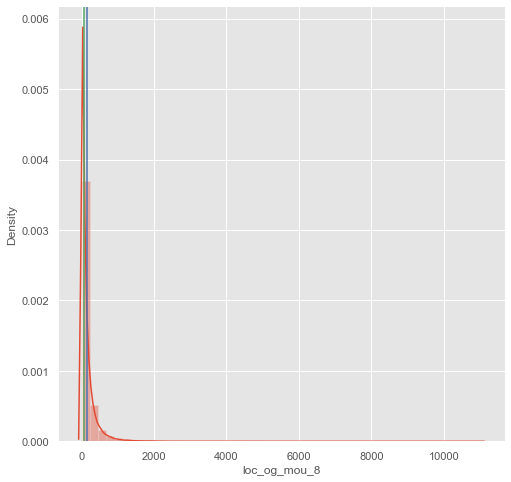

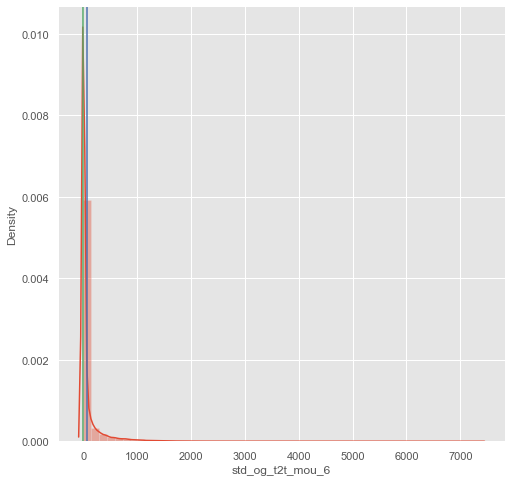

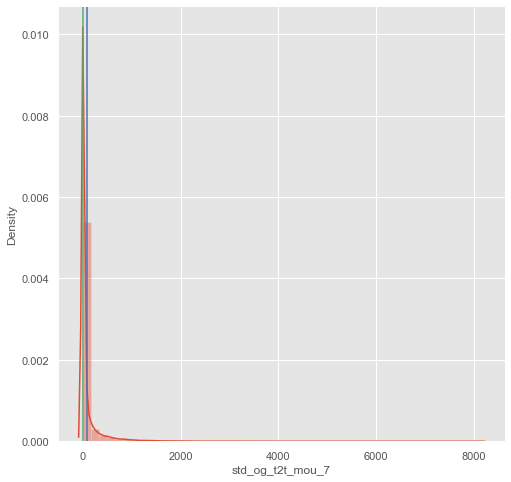

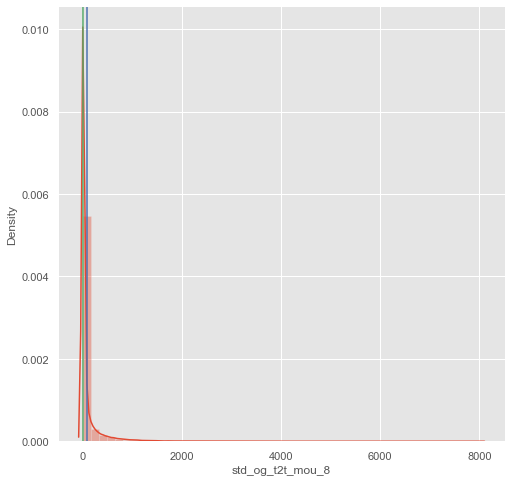

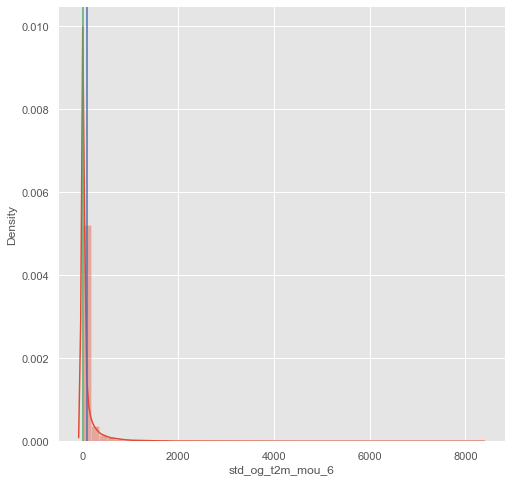

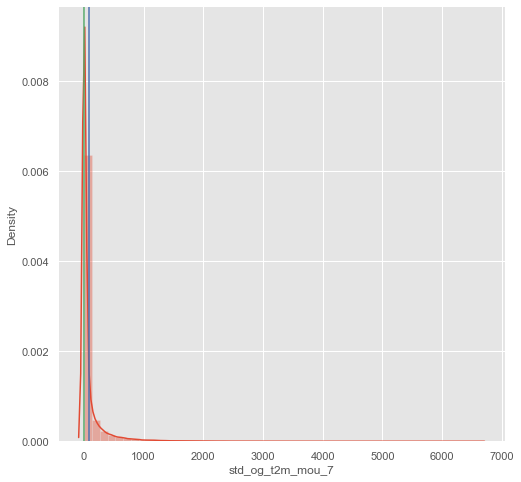

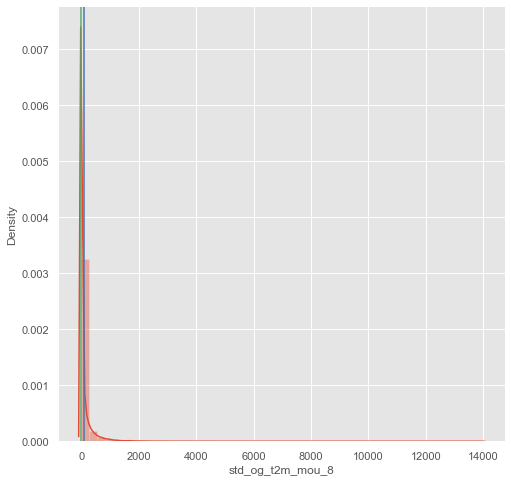

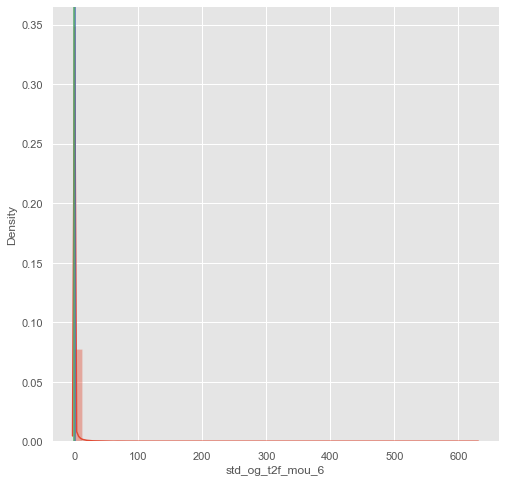

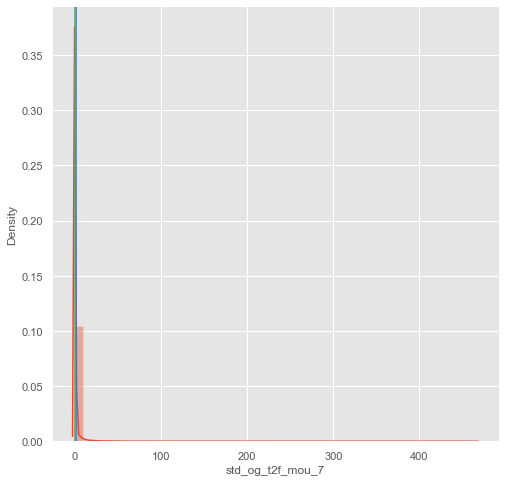

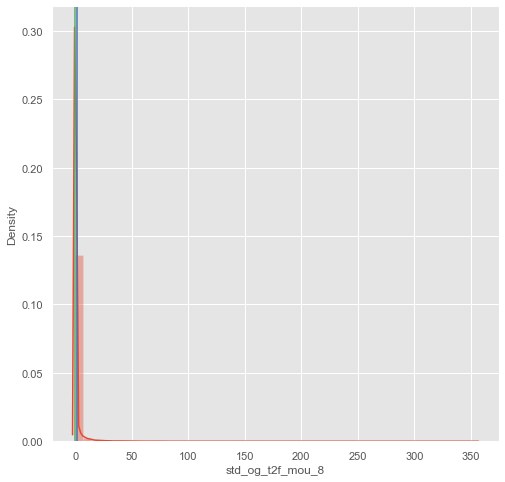

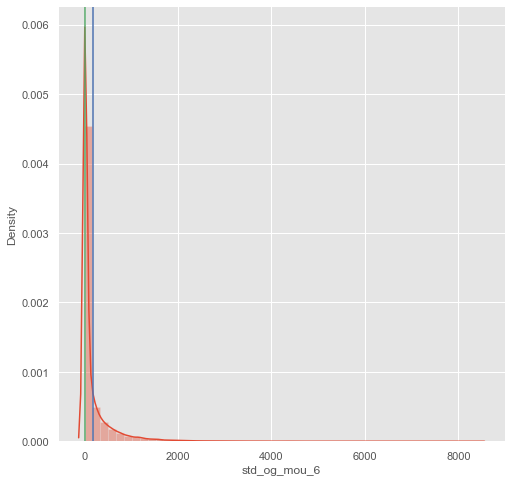

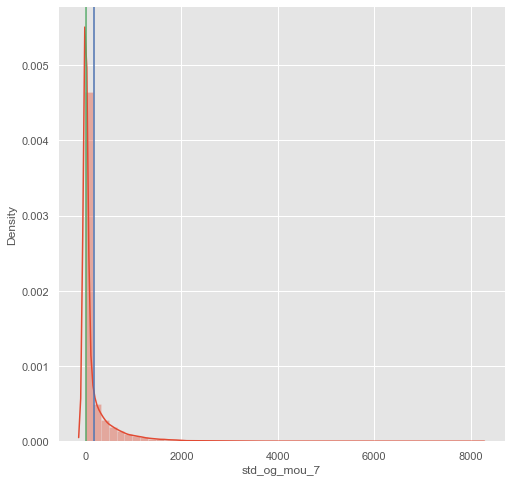

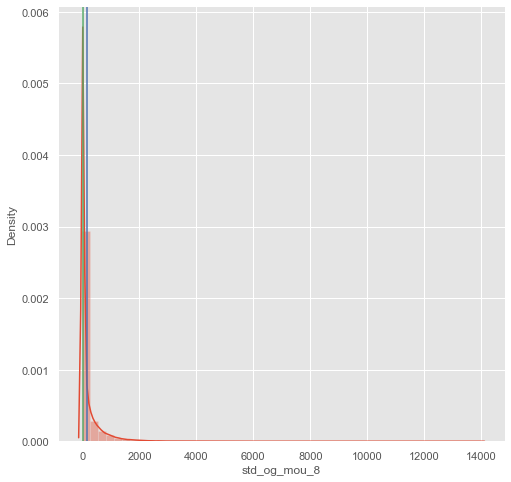

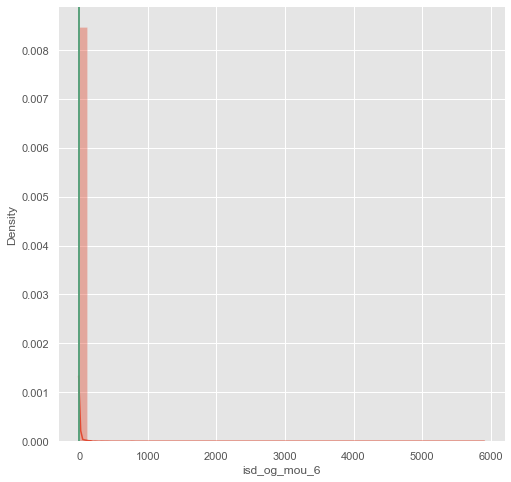

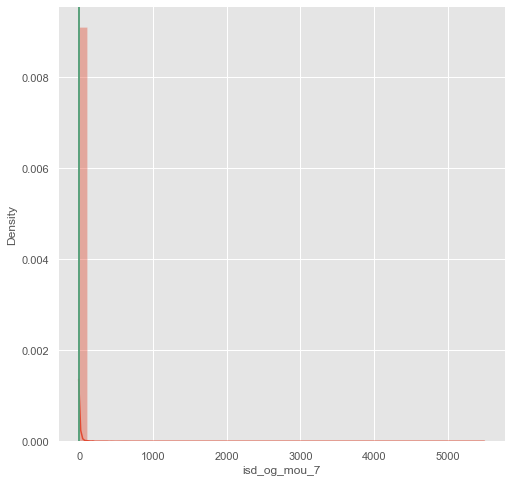

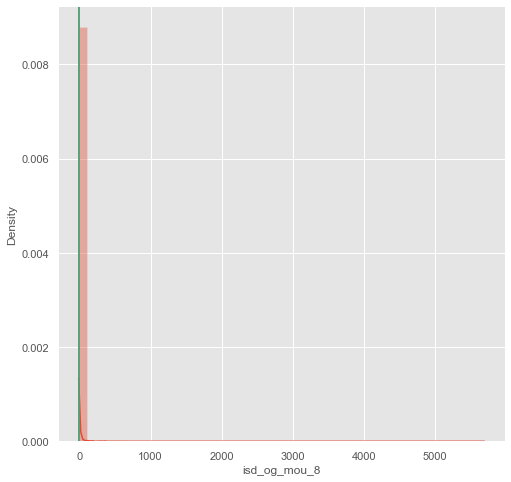

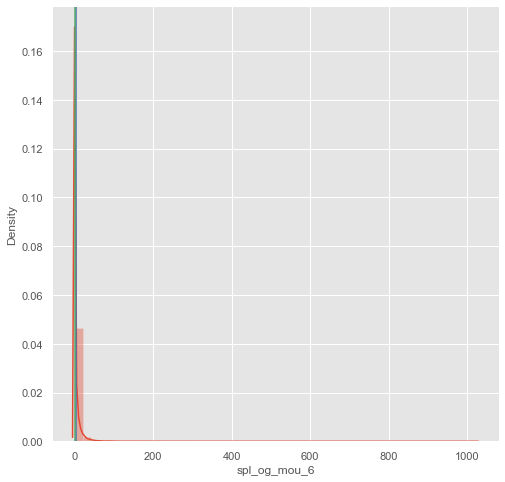

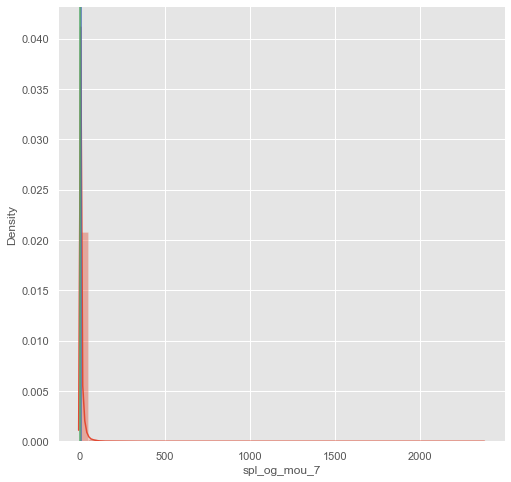

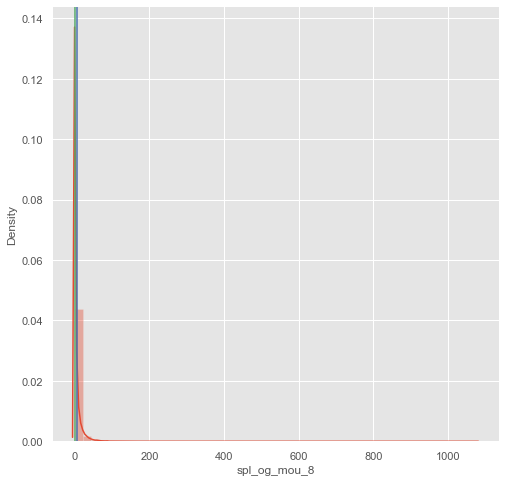

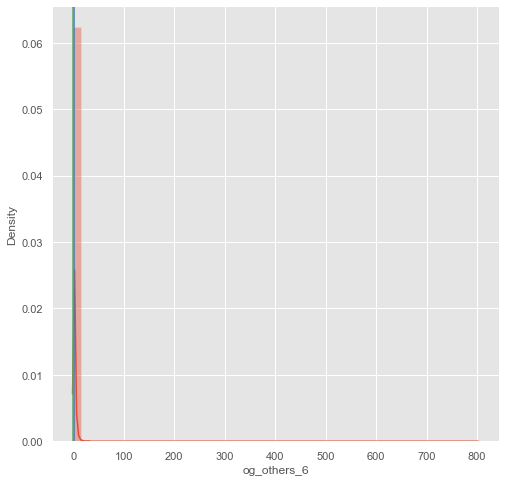

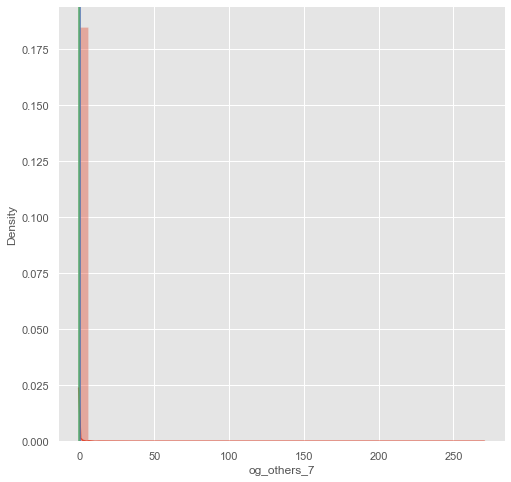

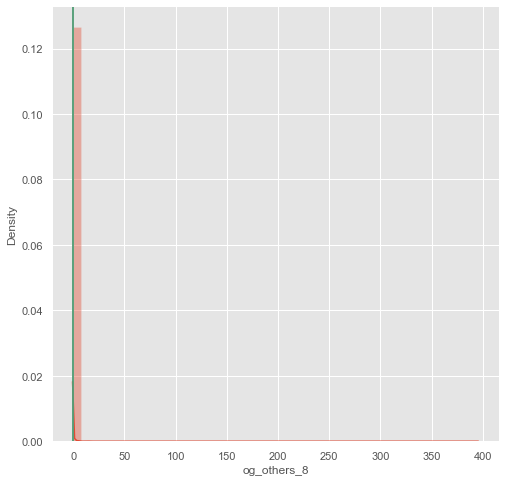

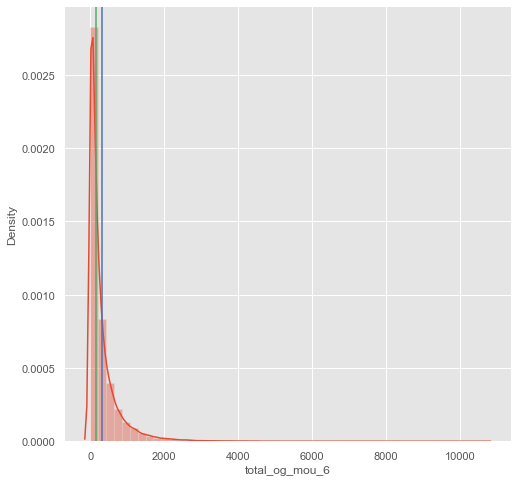

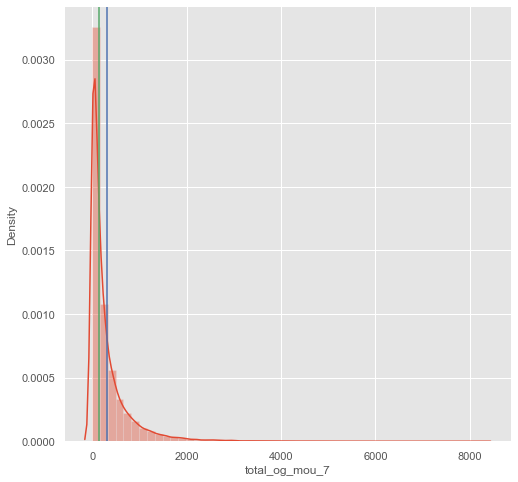

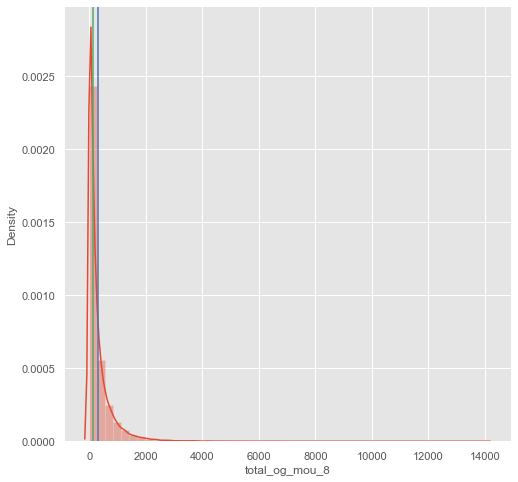

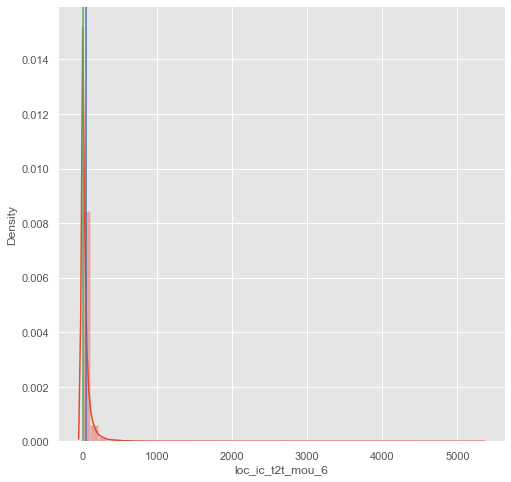

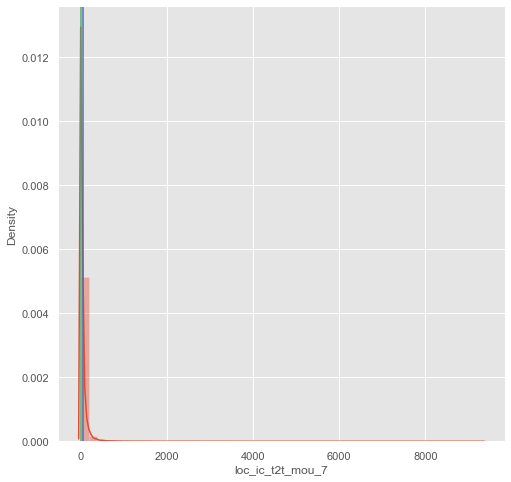

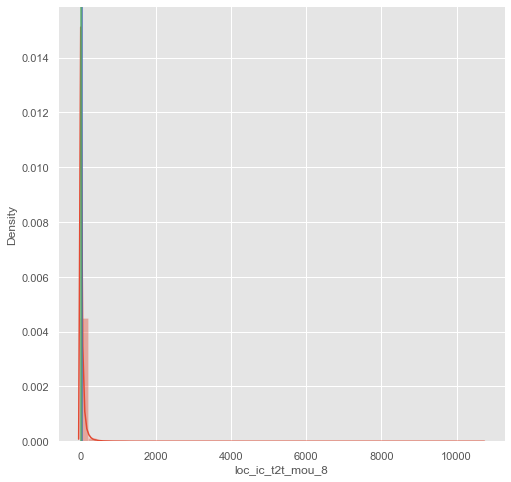

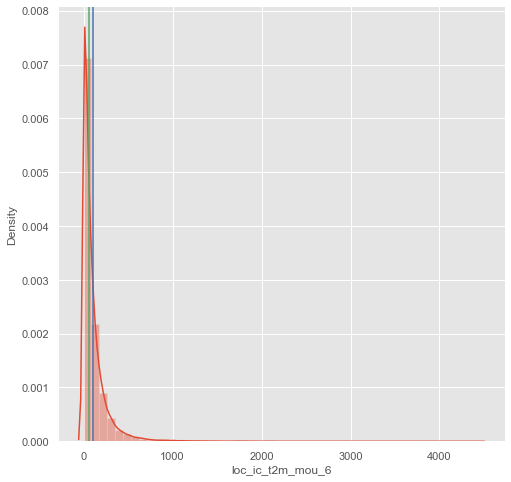

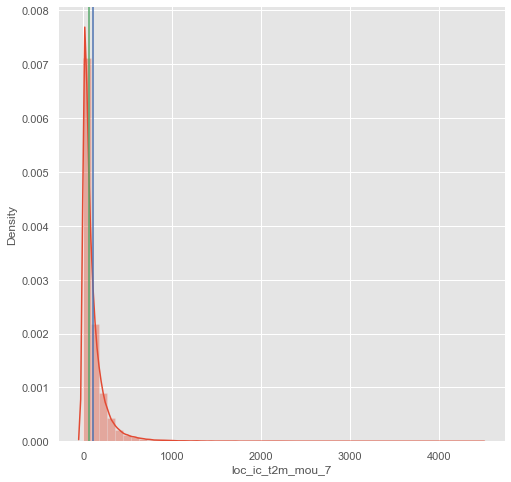

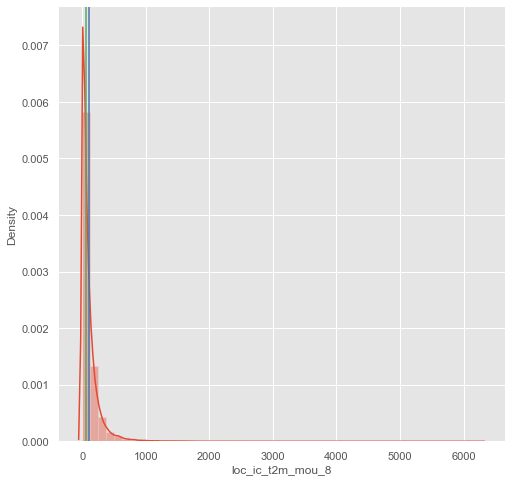

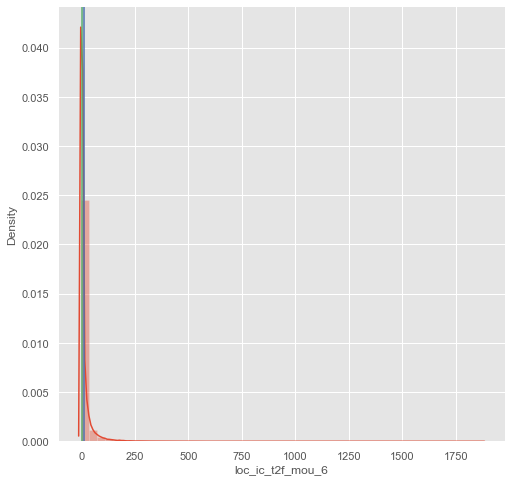

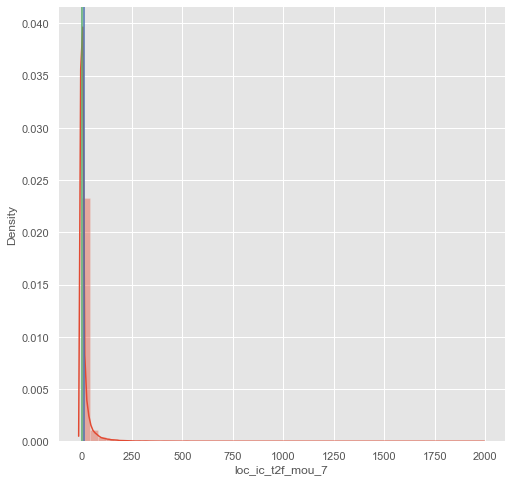

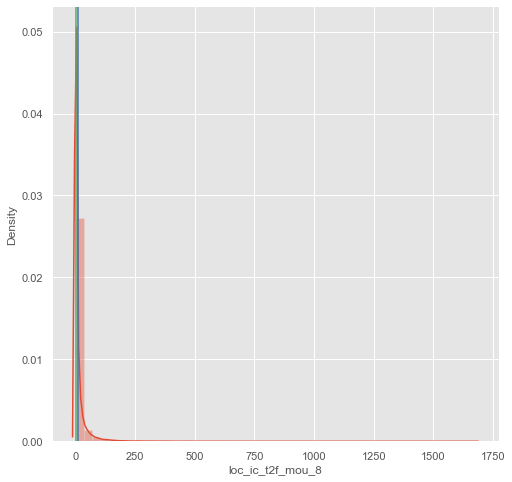

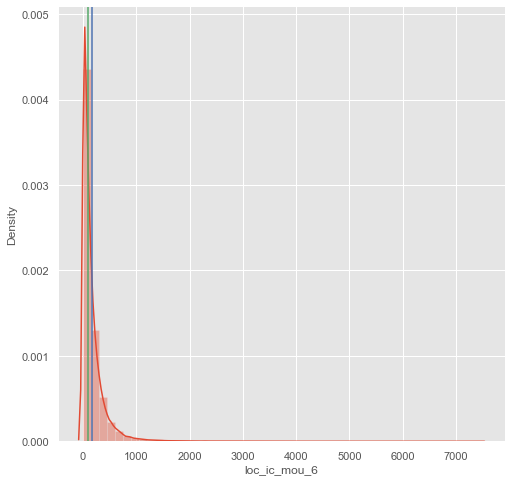

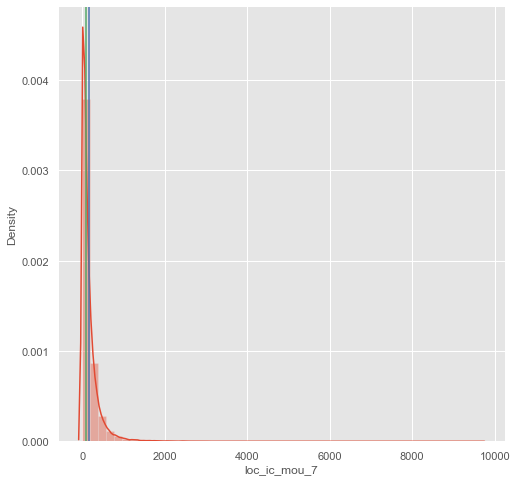

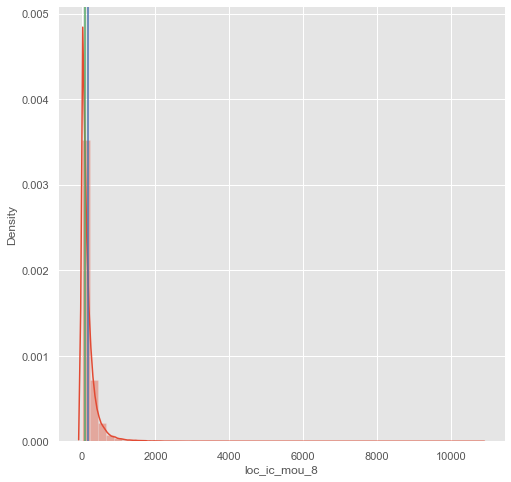

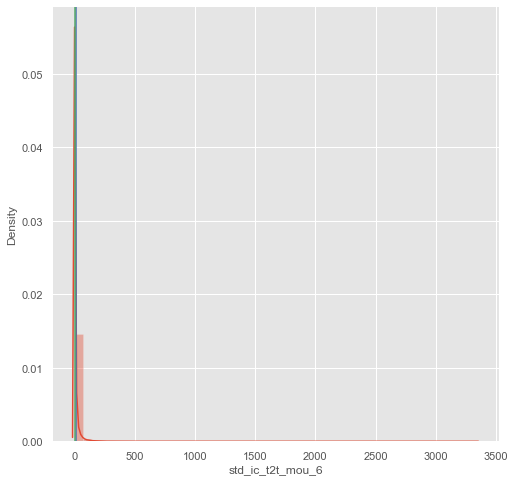

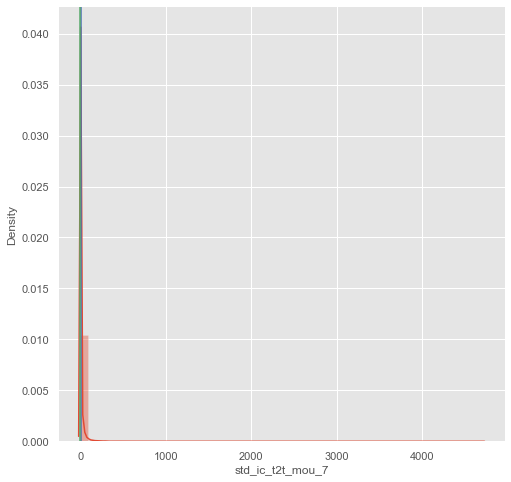

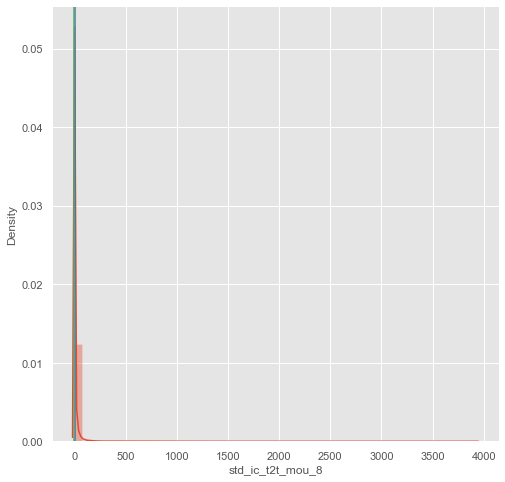

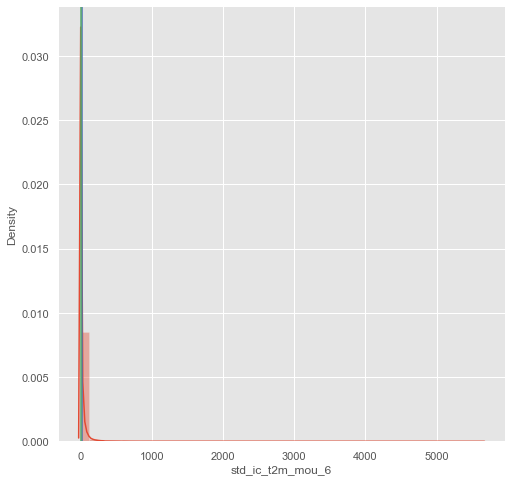

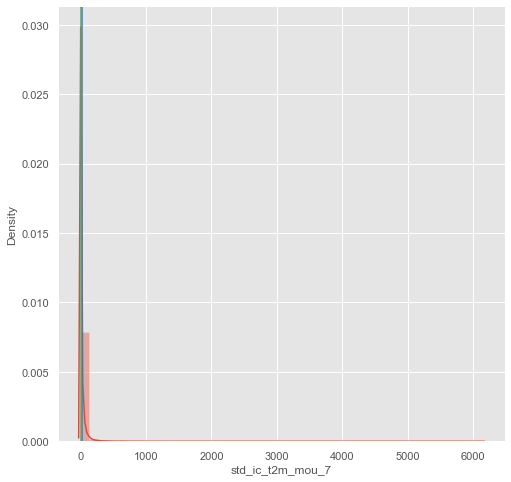

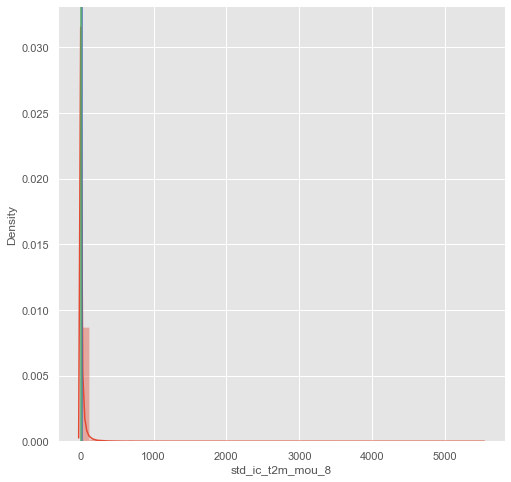

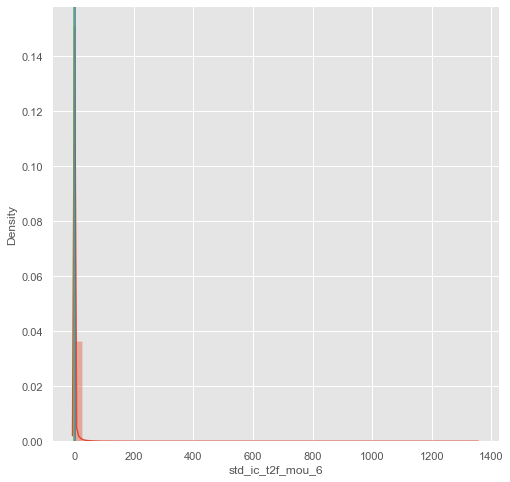

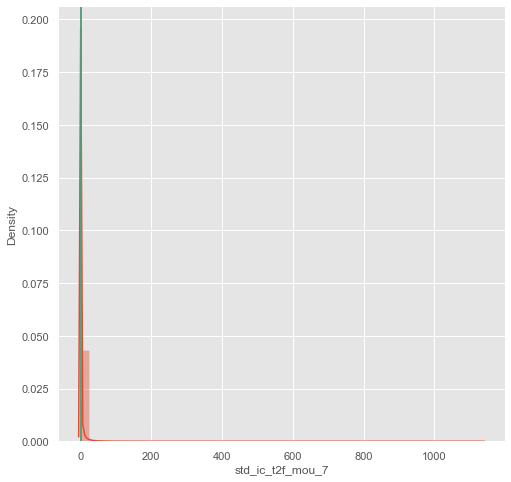

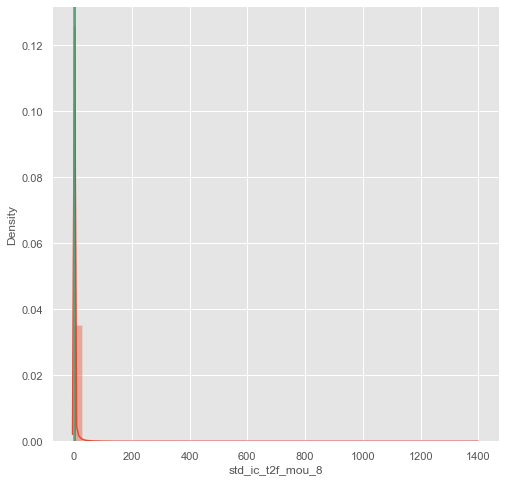

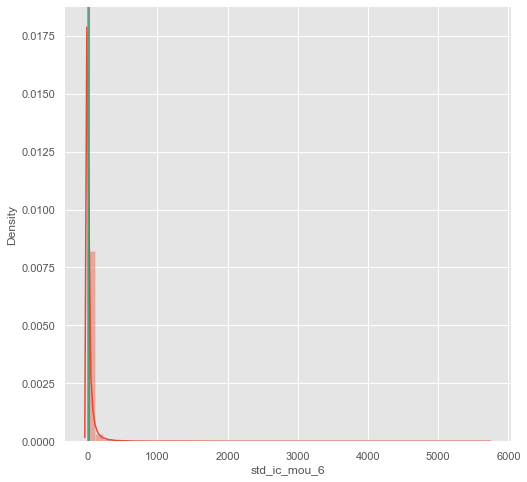

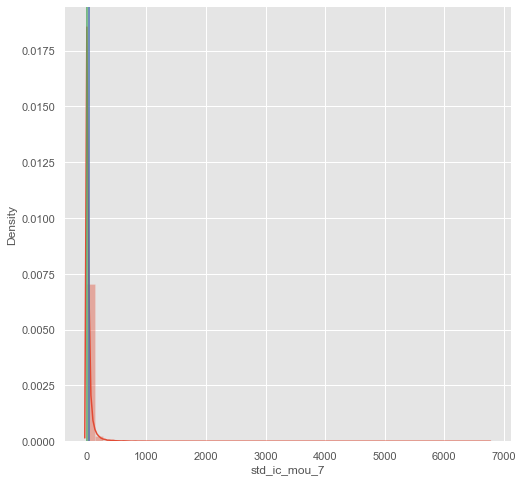

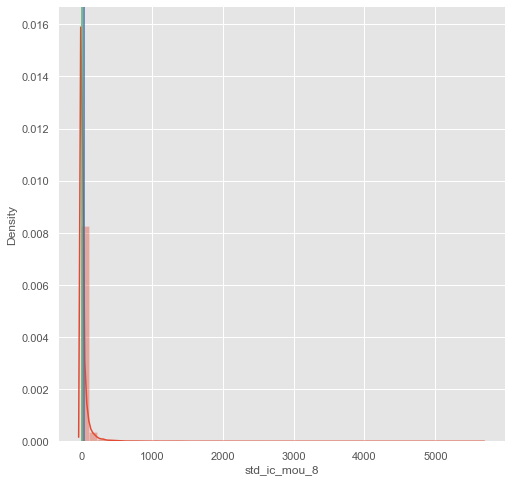

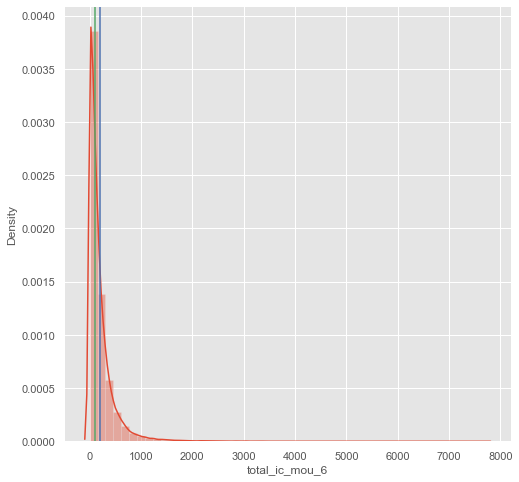

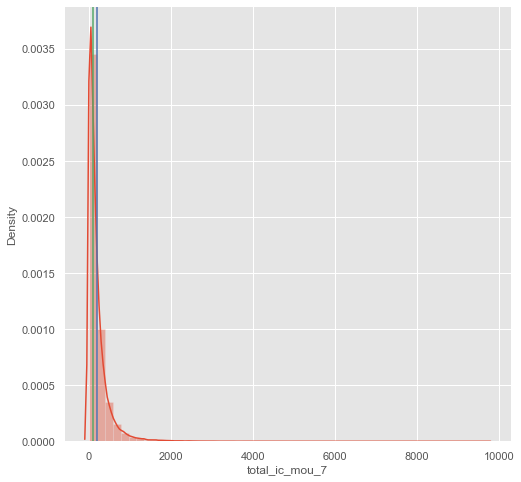

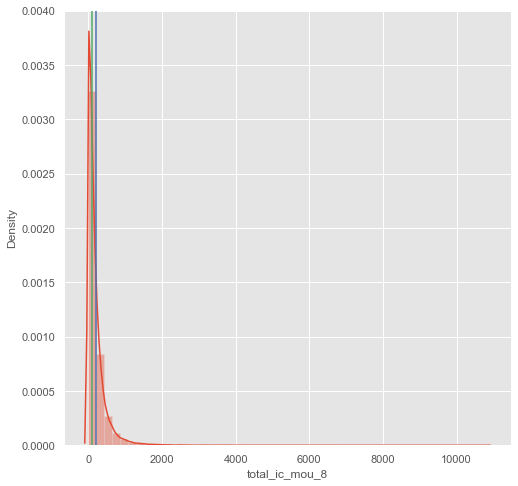

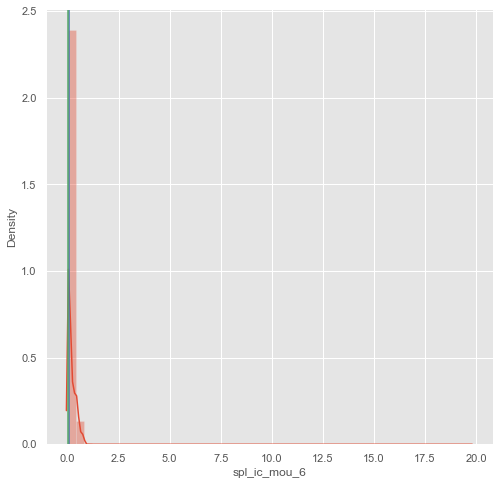

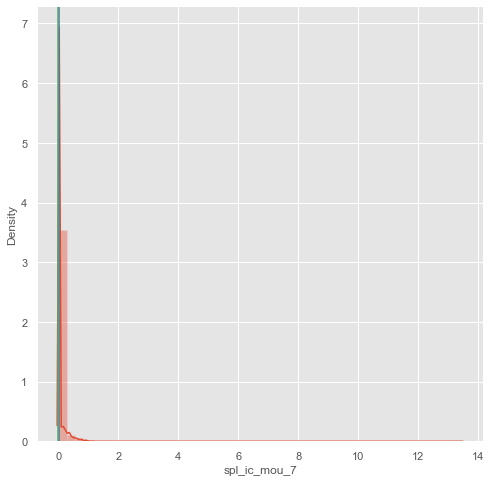

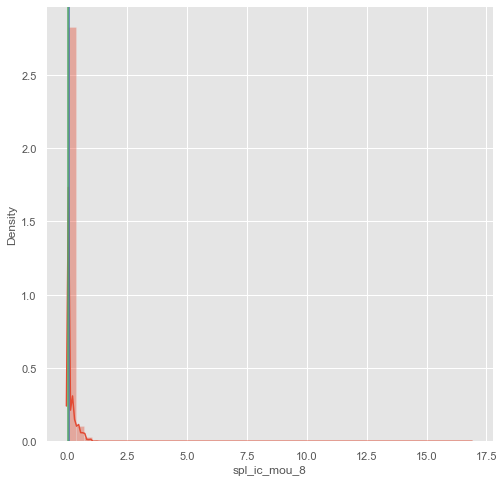

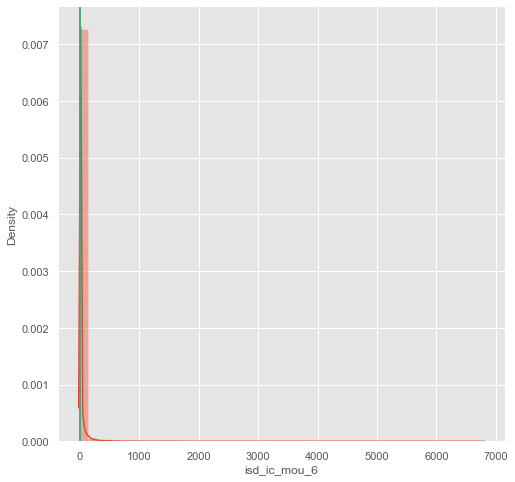

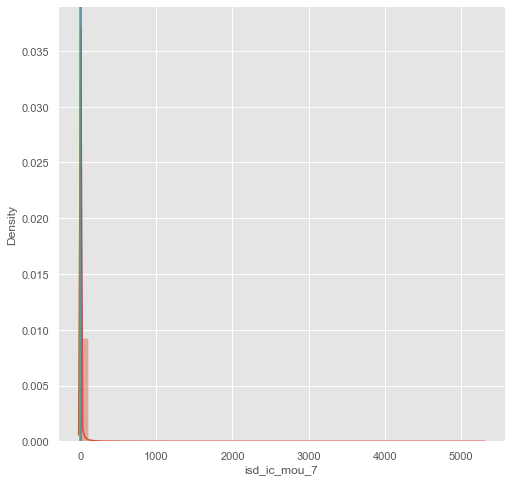

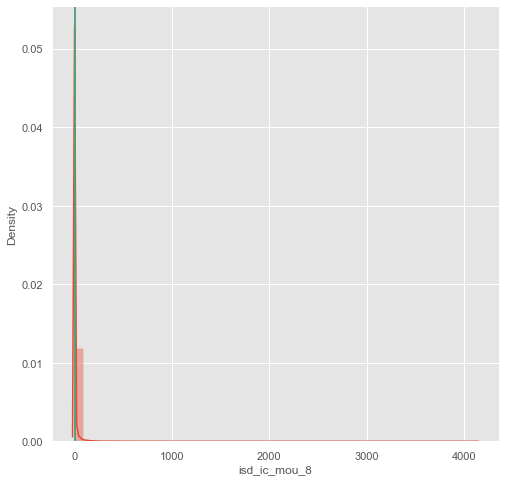

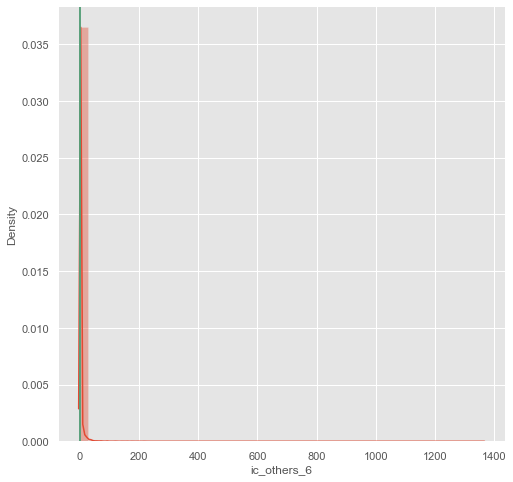

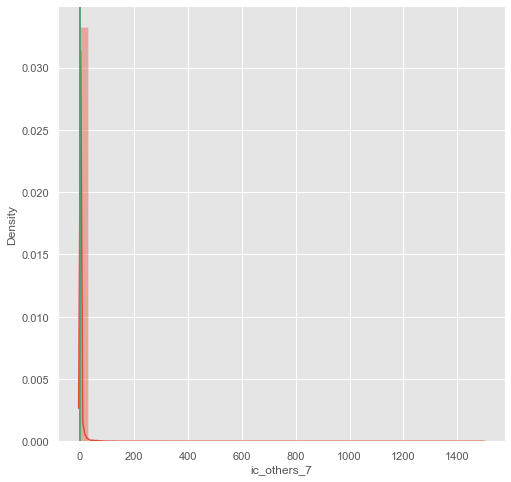

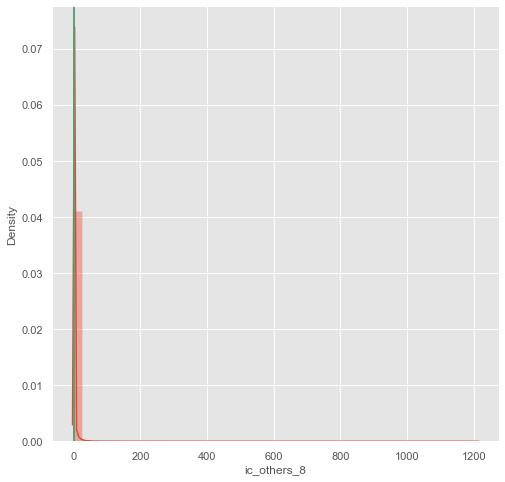

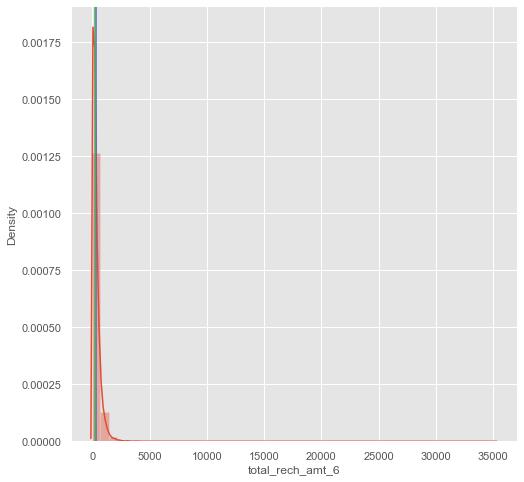

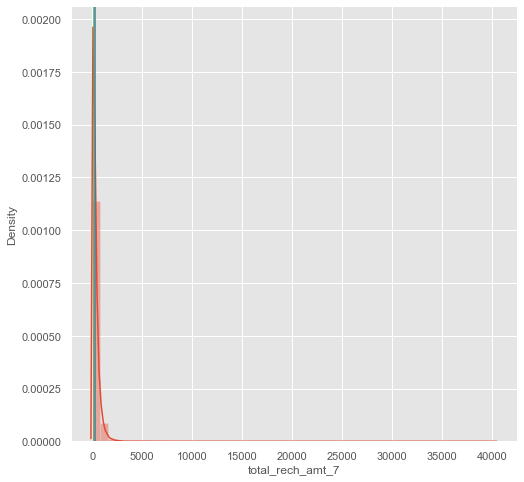

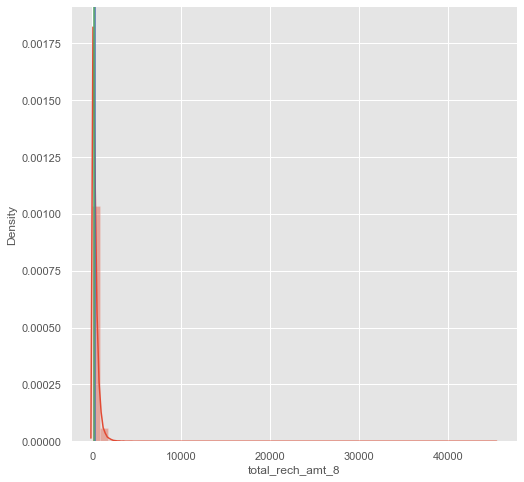

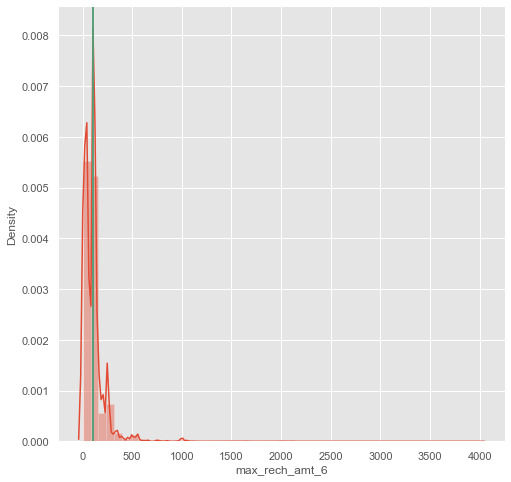

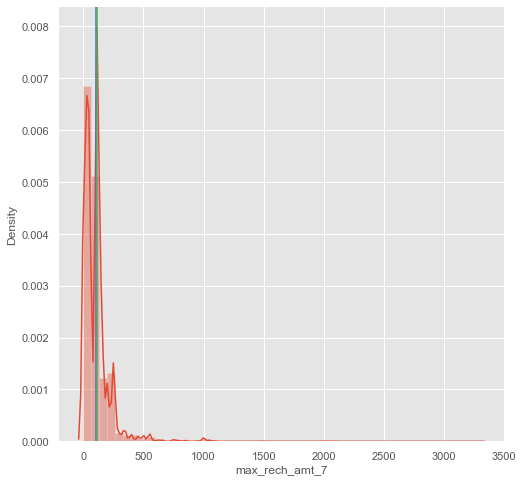

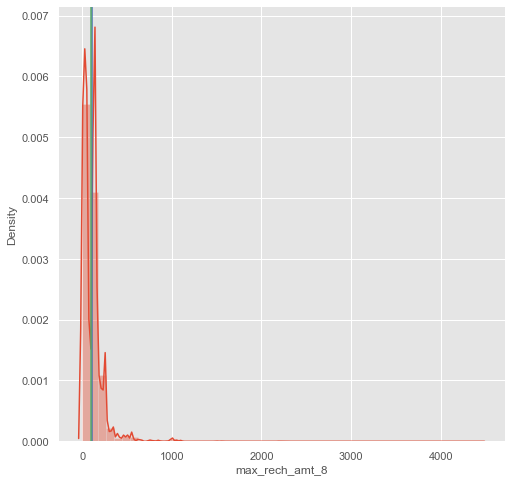

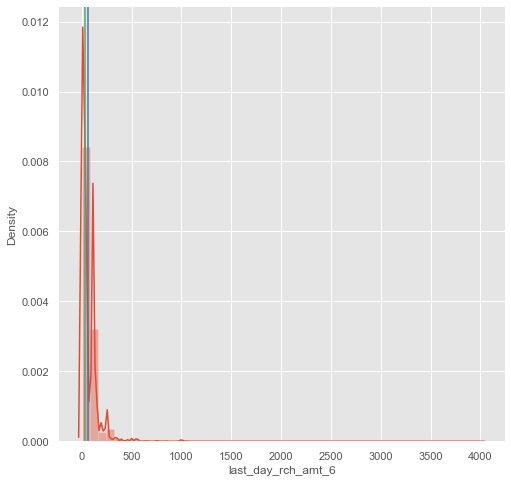

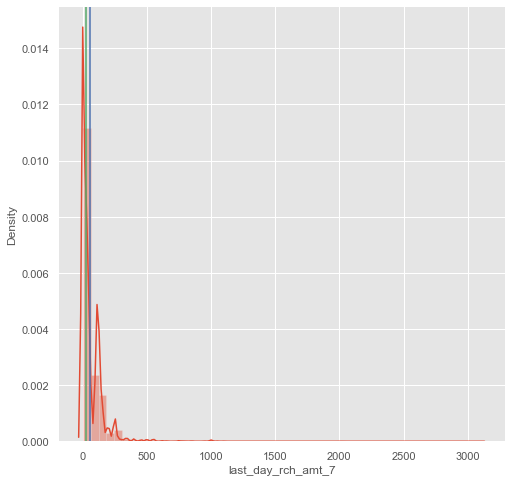

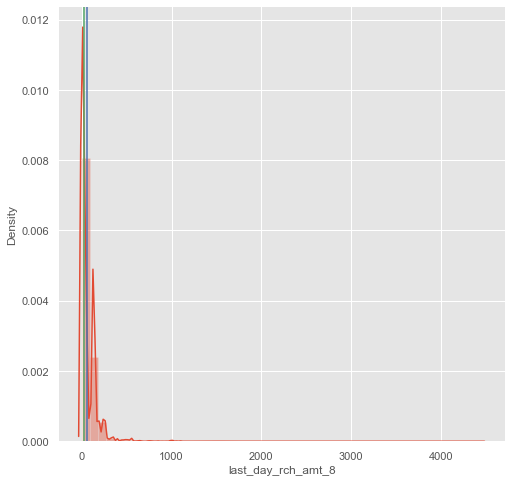

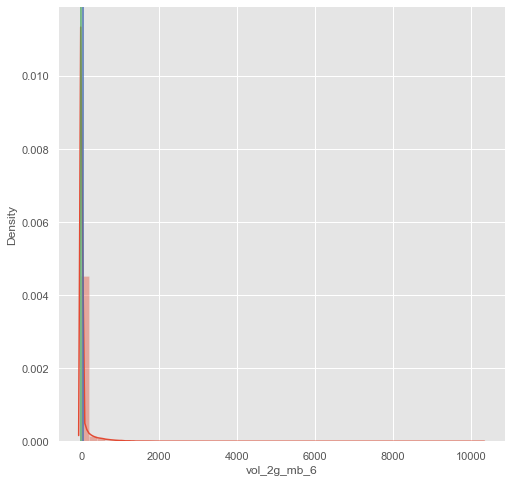

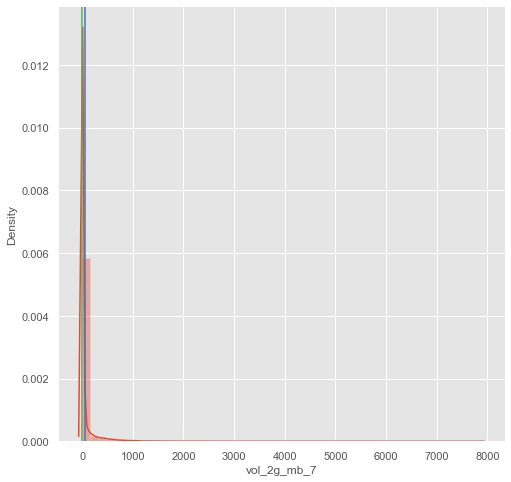

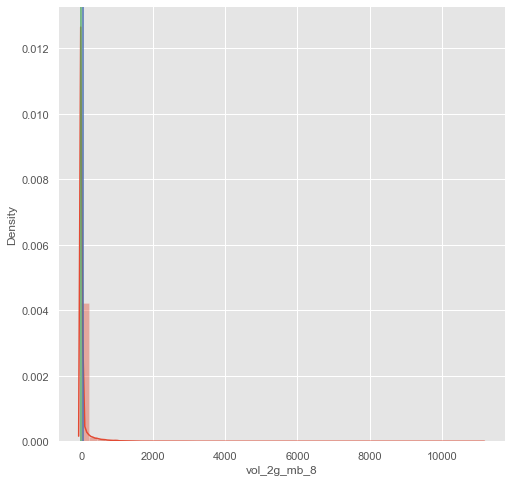

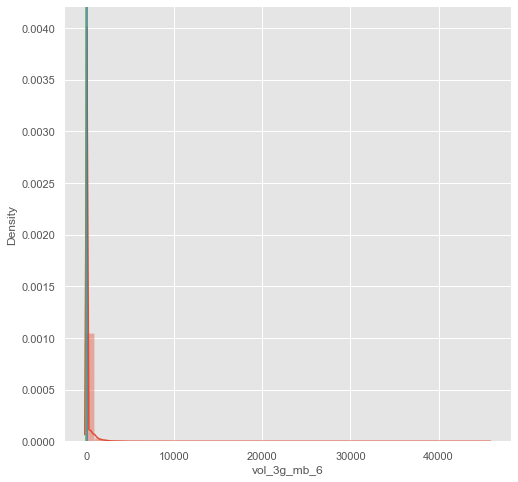

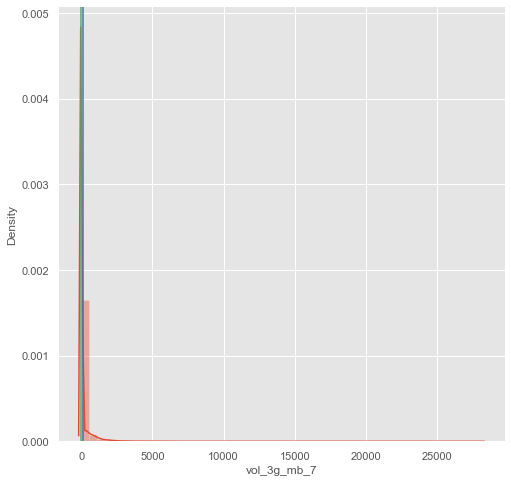

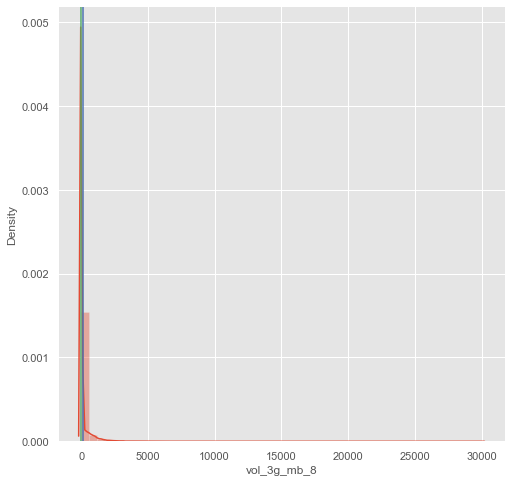

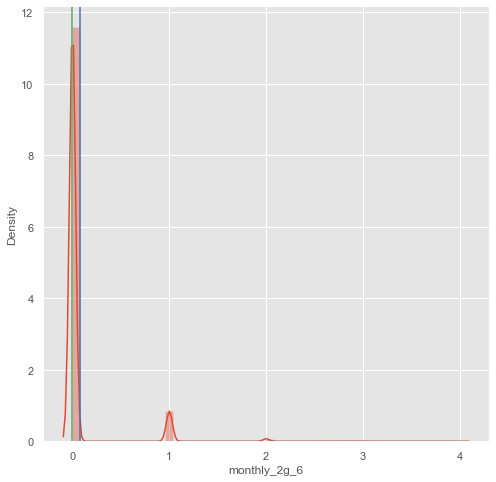

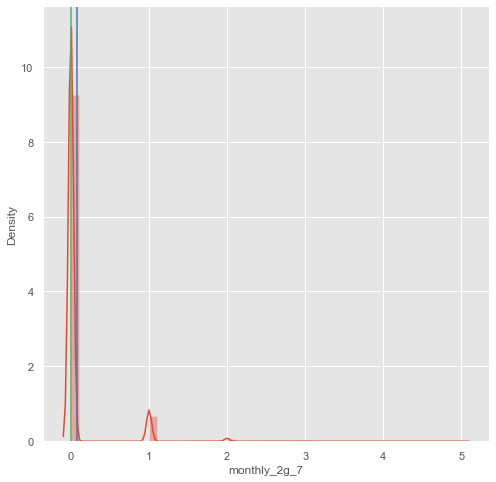

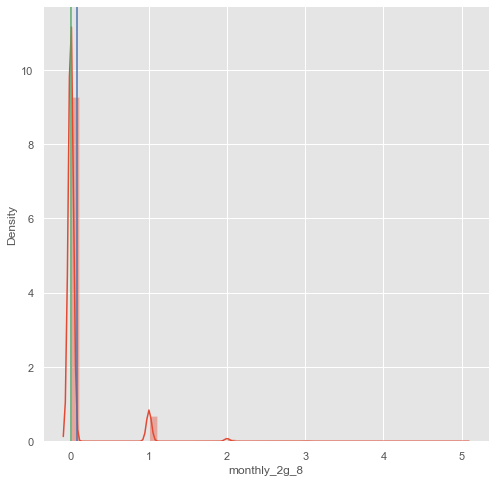

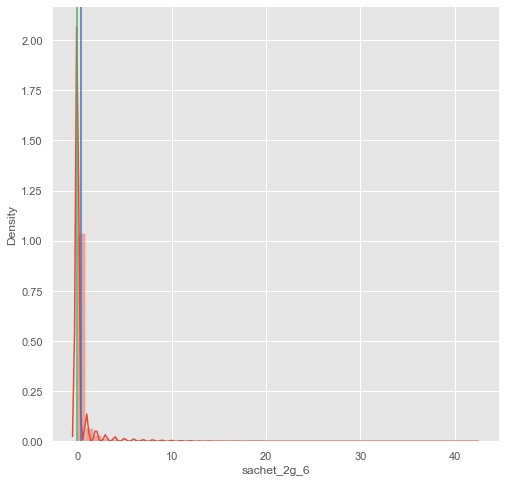

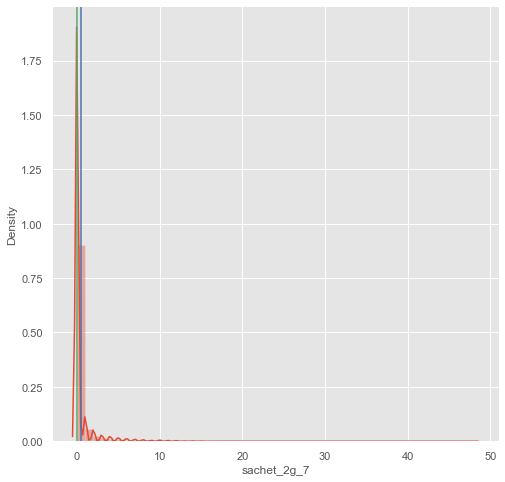

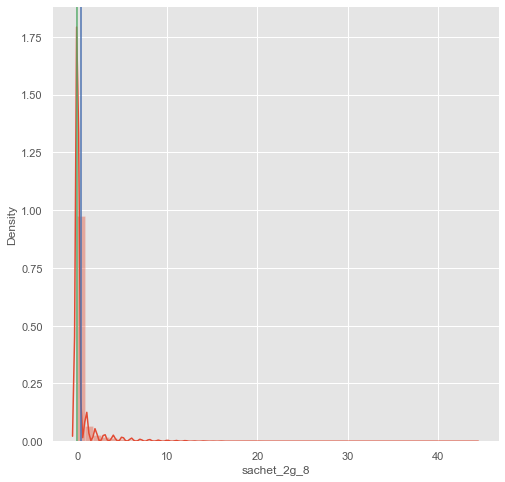

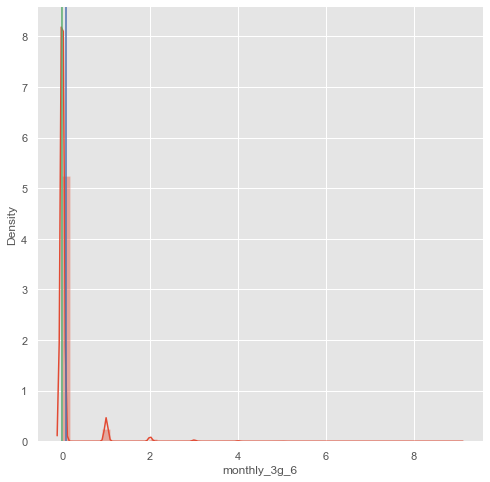

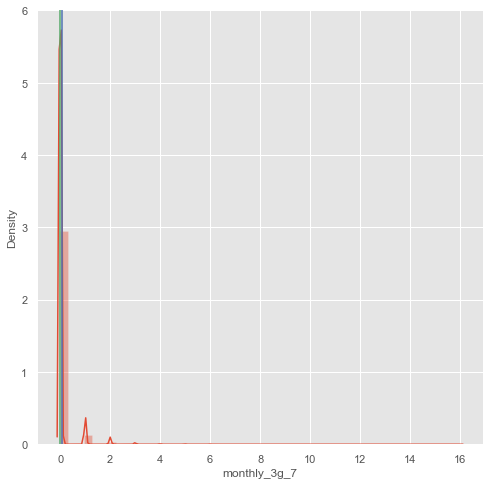

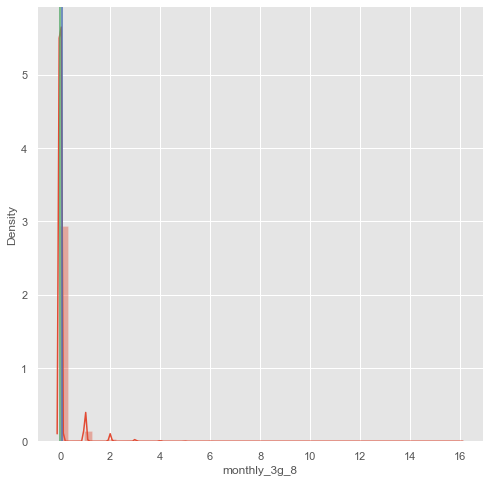

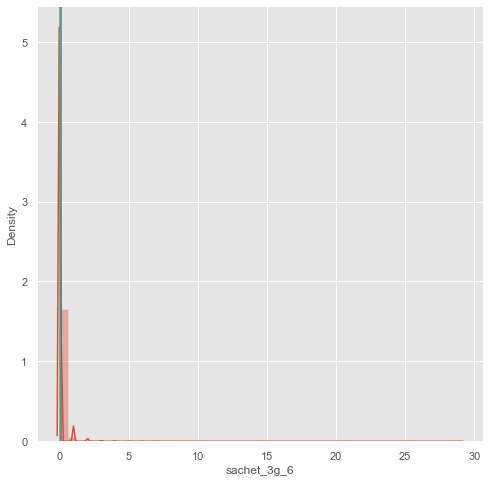

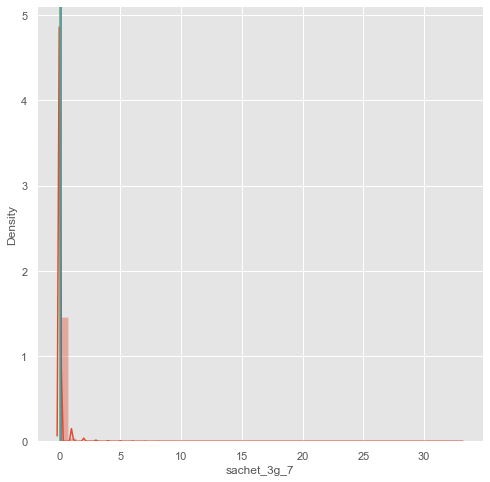

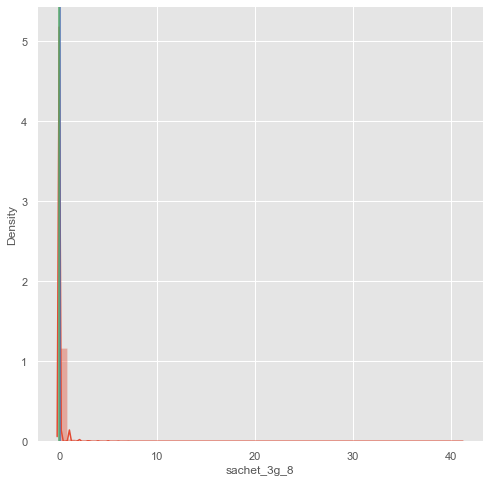

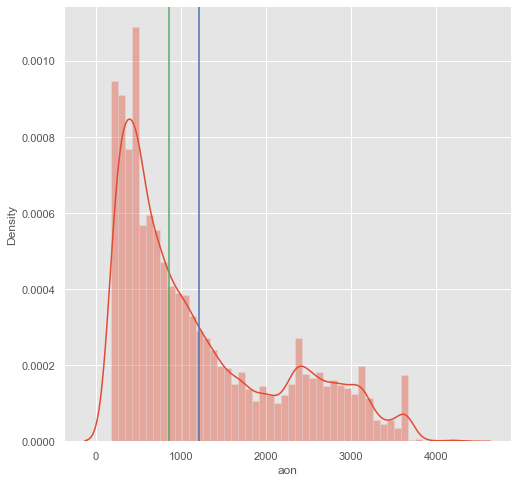

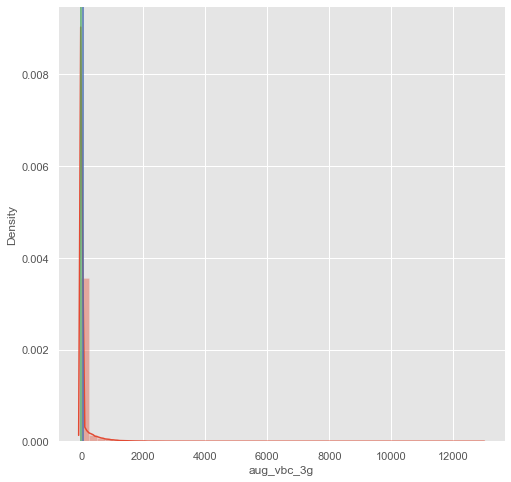

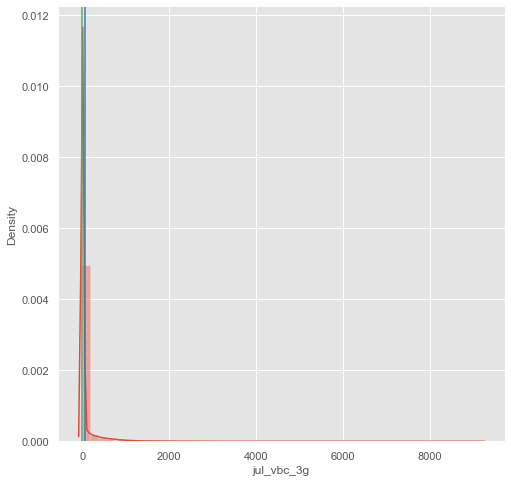

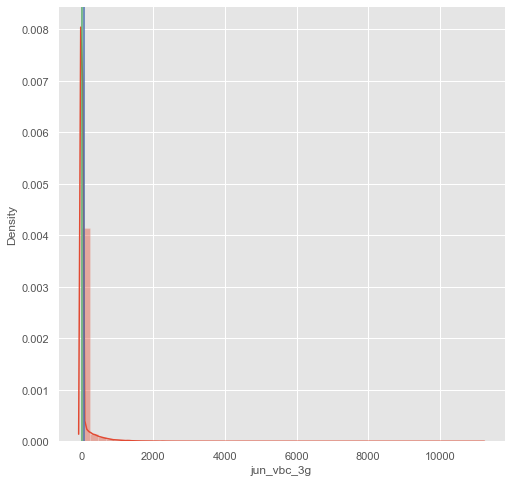

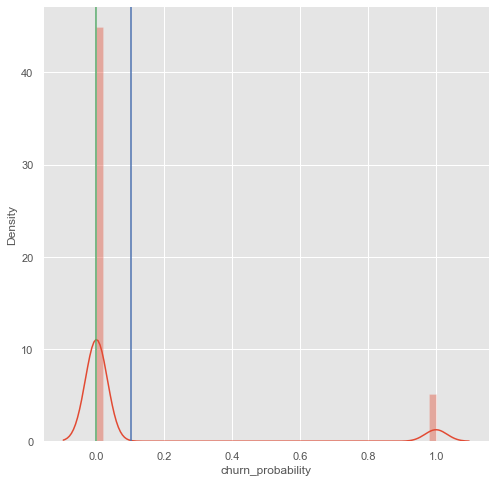

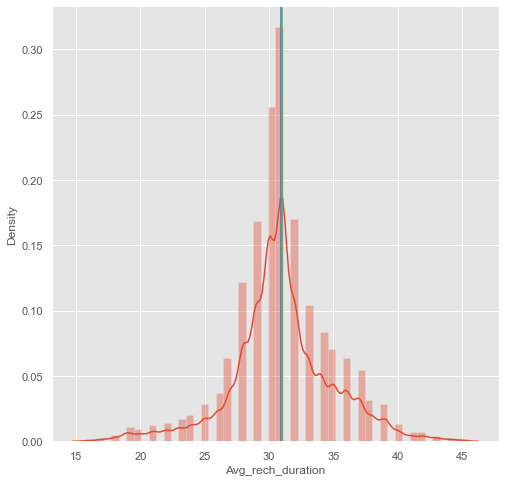

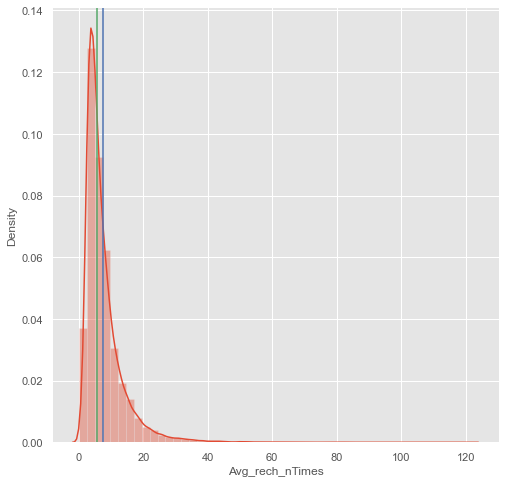

In [82]:
#Checking for mean and median closeness .

for i in telecom.columns:
    plt.figure(figsize=(8,8))
    sn.distplot(telecom[i])
    plt.axvline(telecom[i].mean(),color= 'b')
    plt.axvline(telecom[i].median(),color= 'g')
    plt.show()

In [217]:
telecom.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Avg_rech_duration,Avg_rech_nTimes
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,306.451436,310.572674,304.513065,48.043255,47.882736,47.256388,107.152439,106.489856,108.15473

We can see the data is skewed because of outliers, and hence we canot clearly distinct the difference between mean/median graphically. But looking them statistically throuh describe function , we can see the difference in values- for some columns mean/median are almost similar, while some have a bit differnce. Therefore to be on the safest side we'll replace all the nulls to the mdeian of the columns

In [8]:
for i in telecom.columns:
    telecom[i]= telecom[i].fillna(telecom[i].median())

In [219]:
telecom.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Avg_rech_duration,Avg_rech_nTimes
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038,44.838857,43.890335,91.173739,88.855772,88.435599,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,140.781376,137.782090,136.405430,77.431415,80.560009,79.055781,84.823656,88.167203,85.96945,1.081836,1.042449,1.001784,163.645994,170.062063,166.410655,0.812319,0.779964,0.797125,3.802082,4.785743,4.778142,0.444289,0.023487,0.031310,306.451436,310.572674,304.513065,46.765874,46.652352,45.605017,105.147887,104.587438,105.512617,

No Missing values now in the dataset

# Checking for Outliers and their Treatment

We can clearly see in some columns the difference between 75% data and max values is quiet high, hence it has outliers. Scaling with the outliers presence may lead to skewed standardization. hence we will first treat all those outliers (either by capping the values to max/min -either by using quantiles or  std deviation) 

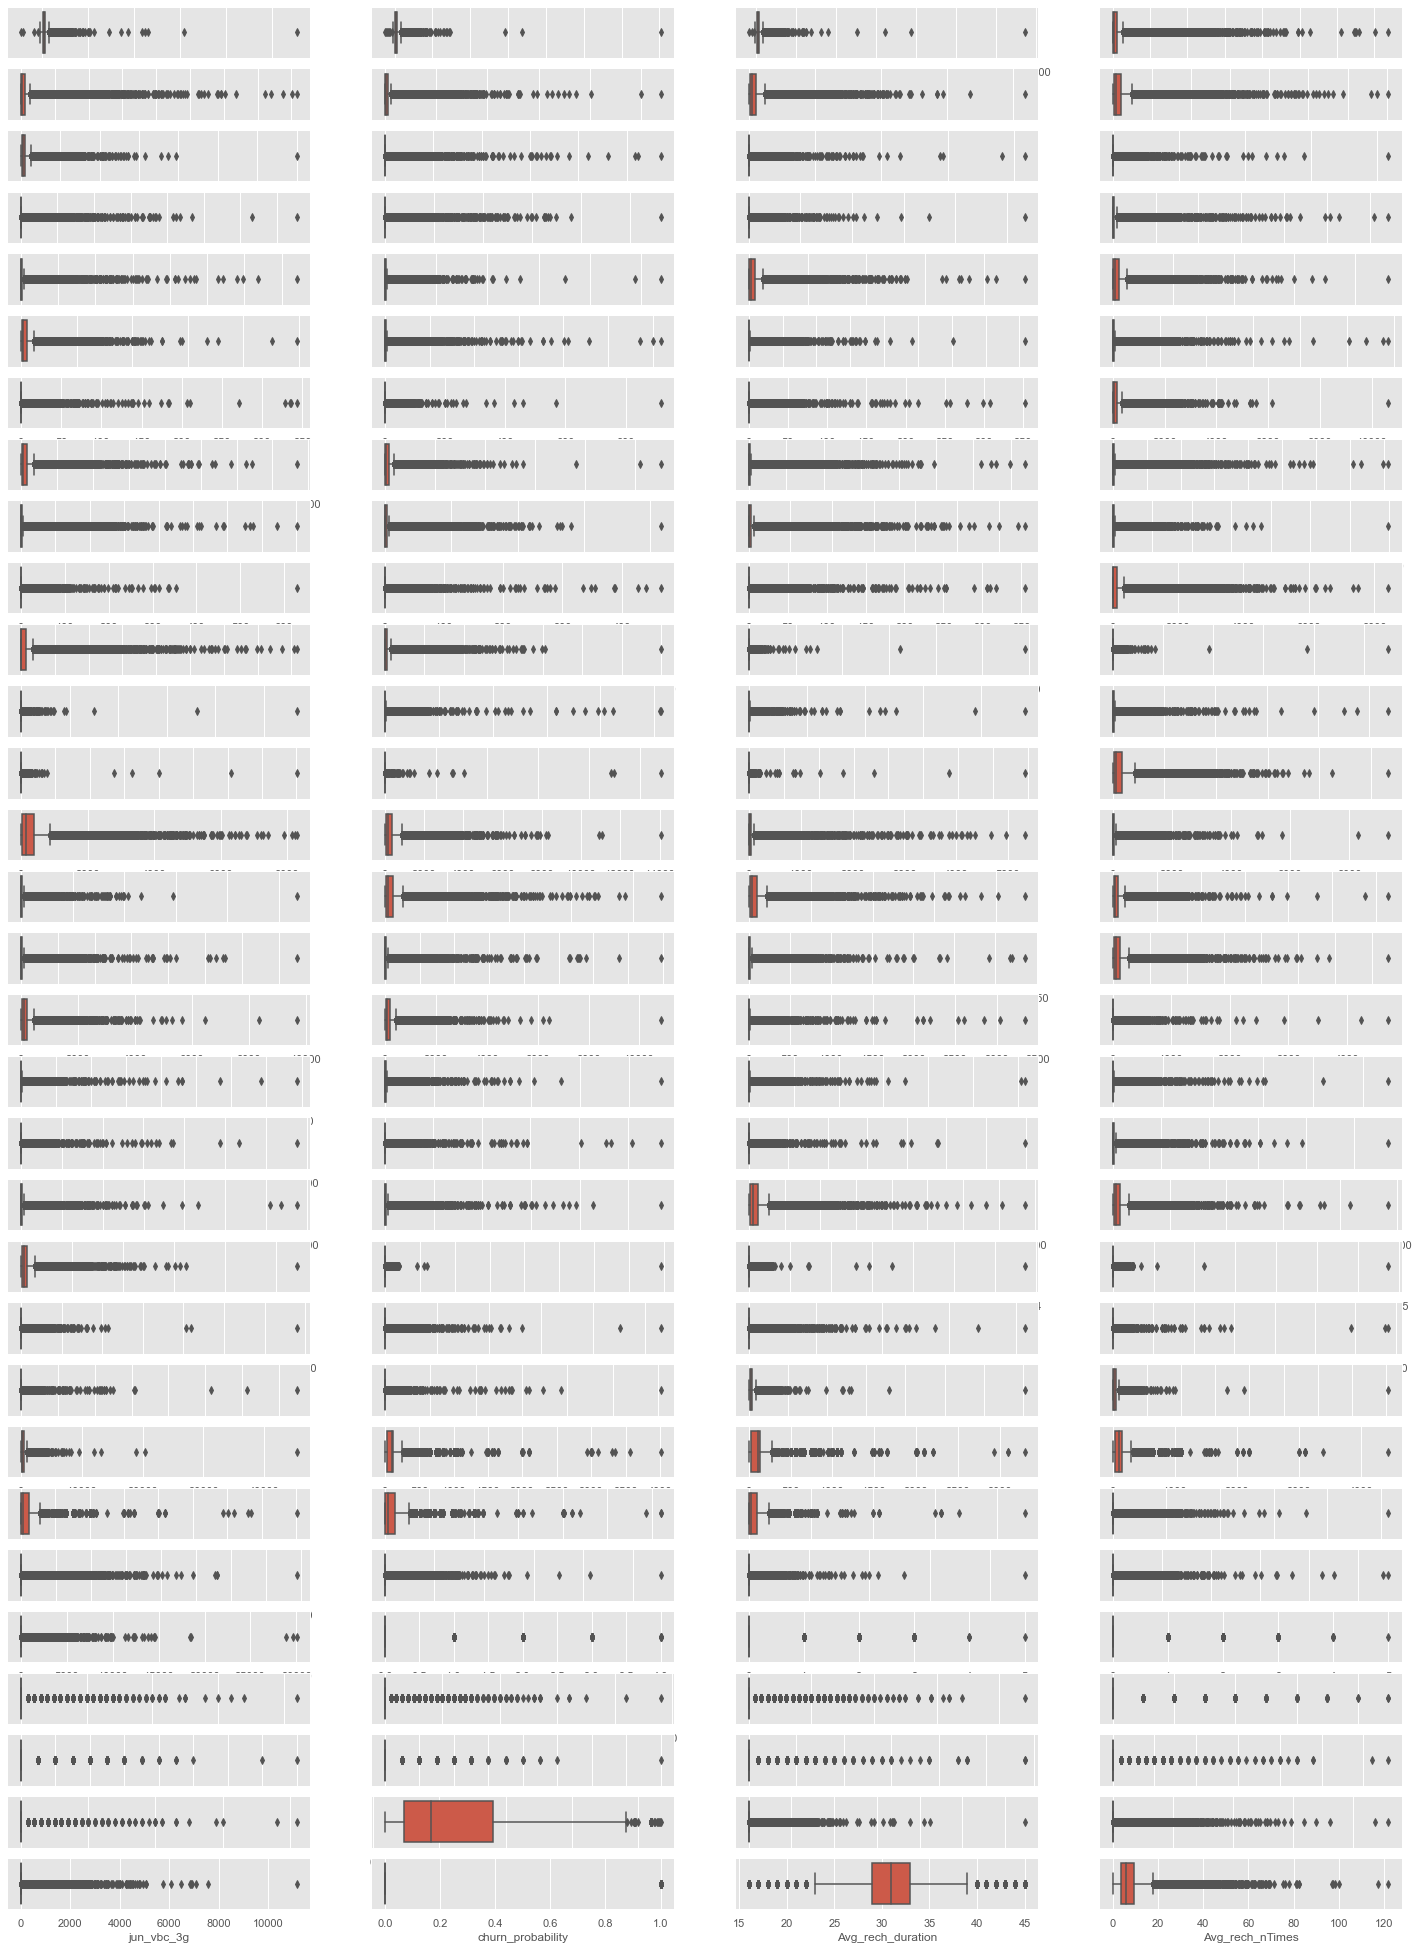

In [9]:
plt.figure(figsize=(25,35))
j=1
for i in telecom.columns:
    plt.subplot(31,4,j)
    sn.boxplot(telecom[i])
    j+=1
plt.show()
# for i in telecom.columns:
#     plt.figure(figsize=(8,6))
#     sn.boxplot(telecom[i])
#     plt.show()

In [10]:
# for i in num_cols:
#     least= float(telecom[i].quantile([0.01]))
#     maxx= float(telecom[i].quantile([0.99]))
#     telecom[i]= telecom[i].apply(lambda x:  maxx if x>maxx else ( least if x<least else x))
    
def cap_outliers(array, k=3):
#     array= telecom[x]
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

telecom=telecom.apply(cap_outliers,axis=0)

In [22]:
telecom.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Avg_rech_duration,Avg_rech_nTimes
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,275.507021,270.587506,271.010108,116.024079,116.403661,114.168080,182.420113,180.586666,178.938431,6.803859,4.625061,4.543311,10.245548,6.729898,6.692217,39.075206,38.343236,37.881246,85.032811,82.954818,82.684108,3.027500,3.057599,2.907660,0.872936,1.077316,1.089767,130.995341,128.254627,127.361313,65.431832,68.229595,66.647128,72.648779,75.619528,74.011300,0.754435,0.715603,0.676650,147.670736,153.633627,150.142774,0.425270,0.416577,0.395919,3.292547,4.194875,4.157952,0.397330,0.006183,0.008281,290.175244,293.838795,288.009108,40.959435,40.837272,40.124591,98.875849,98.438851,99.546891,

In [23]:
# Checking for singleton columns after outlier treatment
for i in telecom.columns:
    if telecom[i].nunique()==1:
        print(i)       

## Multivariance

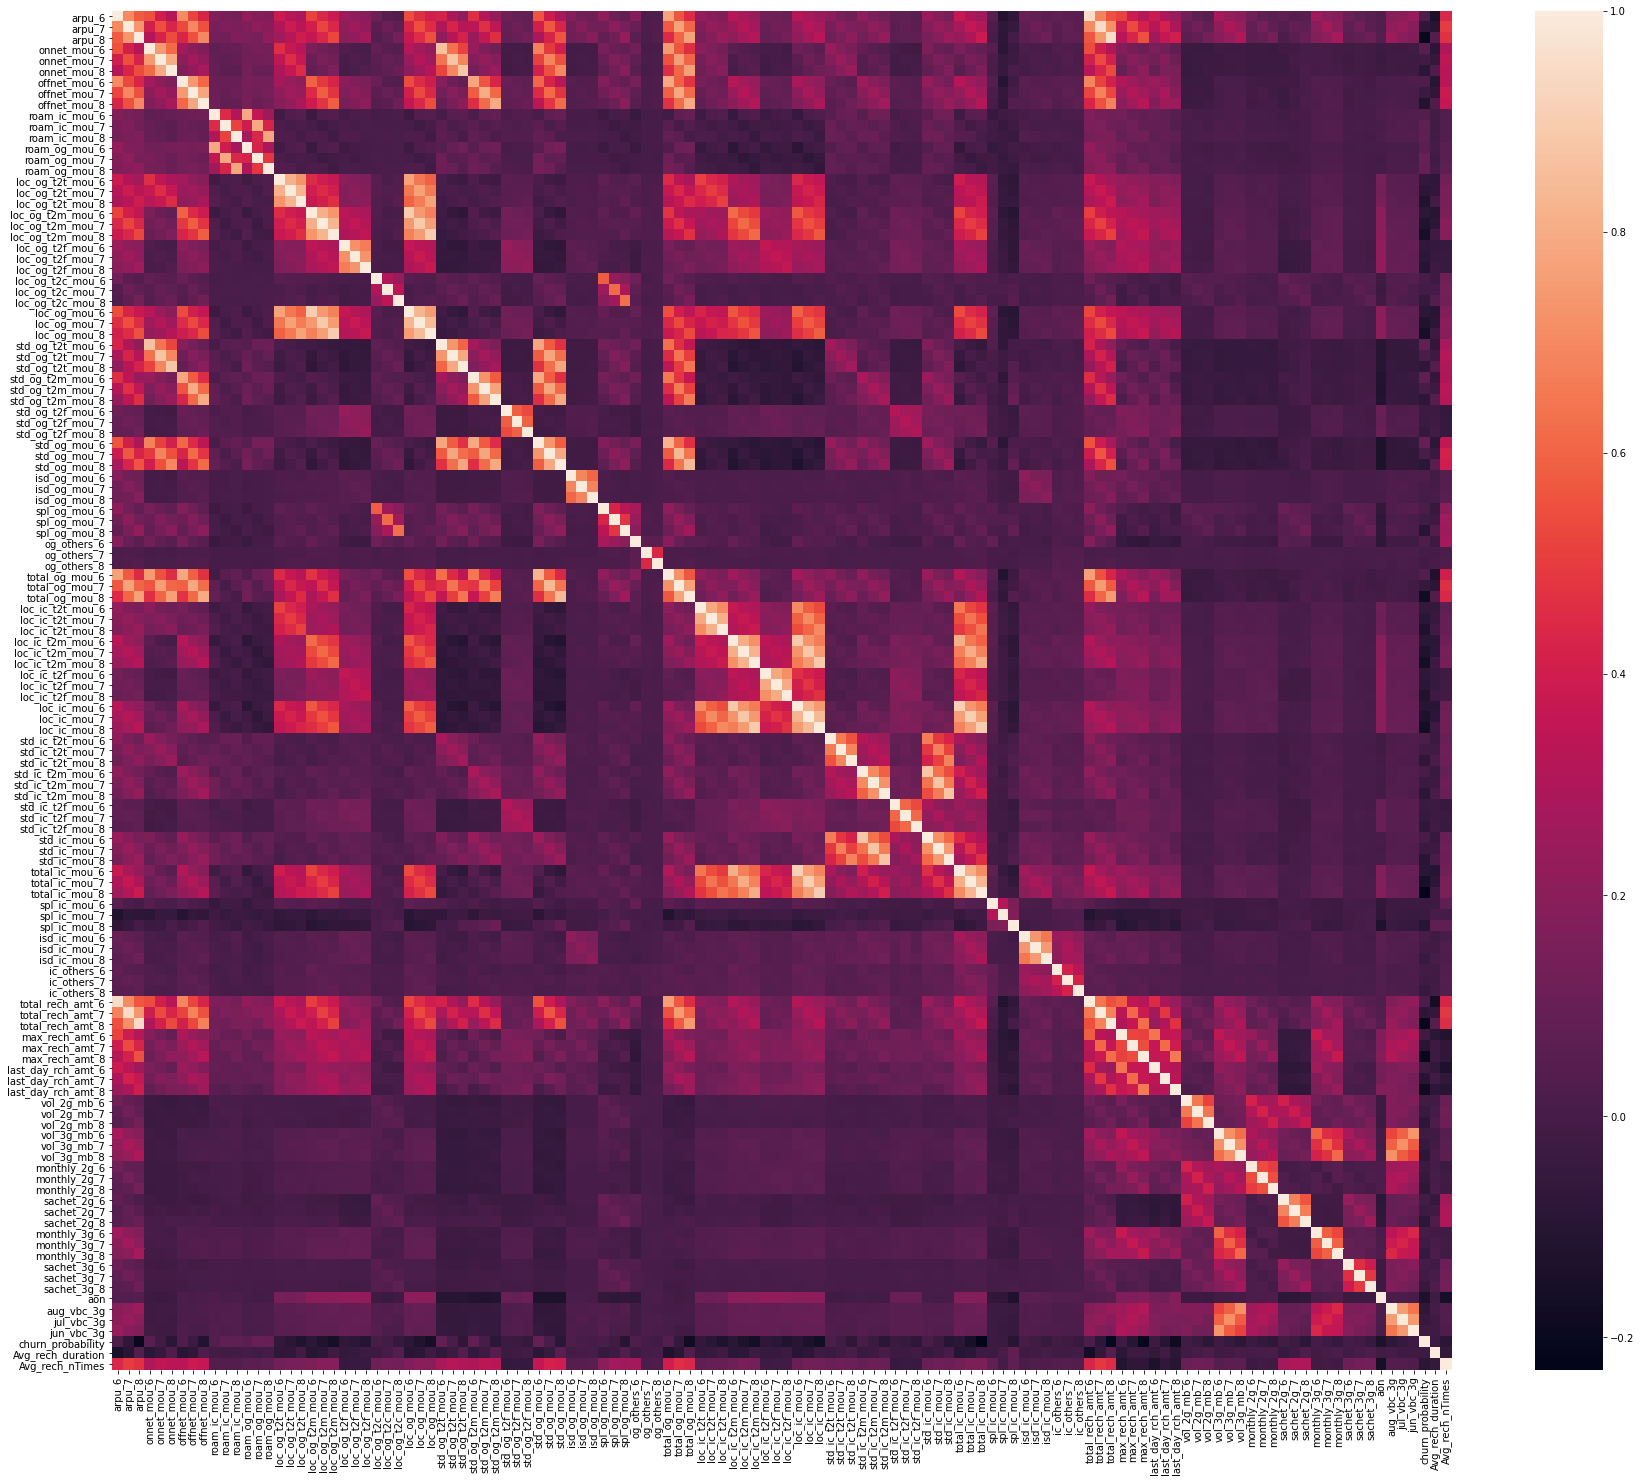

In [232]:
plt.figure(figsize=(30,25))
sn.heatmap(telecom.corr())
plt.show()

We can see there is some multicollinearity present in the dataset. We'll handle it either by  vif/pvalues or we can do feature seletion by RFECV.

# Train-Test Split & Standardising for Train.csv

In [11]:
train,test= train_test_split(telecom,train_size=0.75, random_state=42)

train_y= train.pop('churn_probability')
train_x= train.copy()

test_y= test.pop('churn_probability')
test_x= test.copy()


In [12]:
# rb= StandardScaler(with_centering=True, with_scaling=True)
rb= StandardScaler()

train_x_scaled= rb.fit_transform(train_x)
test_x_scaled= rb.transform(test_x)

train_x_scaled= pd.DataFrame(train_x_scaled, columns= train_x.columns)
test_x_scaled= pd.DataFrame(test_x_scaled, columns= test_x.columns)

train_x_scaled.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_duration,Avg_rech_nTimes
count,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04,5.249900e+04
mean,-8.464455e-18,-1.480643e-17,-1.584054e-16,-6.822087e-17,1.944471e-16,-7.360337e-17,-2.861871e-16,1.356422e-16,-2.146832e-16,1.624645e-15,1.823803e-15,4.441135e-16,2.474851e-16,-9.605959e-16,5.747819e-16,1.068372e-16,-6.117445e-17,-5.190656e-18,2.697301e-16,-5.143087e-17,1.745135e-16,1.216003e-16,1.340752e-16,-1.521267e-16,5.464770e-16,-6.767858e-16,-2.476986e-16,1.194306e-16,-1.081975e-16,-8.378220e-17,7.145637e-17,1.303985e-15,-1.316038e-15,-1.285578e-15,1.536787e-15,1.277035e-15,-6.401404e-16,-3.104476e-15,7.316425e-16,7.004377e-16,-6.779526e-16,4.935638e-16,-7.744408e-16,-1.773704e-15,-2.586568e-16,1.157158e-15,-5.0

# Feature Selection using RFECV

In [13]:
logistic= LogisticRegression(random_state= 100)
rfecv= RFECV(estimator= logistic, cv=4,scoring= 'roc_auc')
rfecv.fit(train_x_scaled, train_y)

list(zip(train_x_scaled.columns, rfecv.support_, rfecv.ranking_))
train_x_scaled.columns[rfecv.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7',
       'roam_og_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_8',
       'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_

In [ ]:
cols=train_x_scaled.columns[rfecv.support_]
print(len(cols))
train_x_scaled_1= train_x_scaled[cols]
score= cross_val_score(logistic,train_x_scaled_1, train_y,scoring= 'roc_auc',cv= 5, n_jobs=-1)
score


We have considerable amount of columns reduced by RFECV. Starting with these columns for modelling then we will be eliminating the colsumns based on VIF/Pvalues or Feature importance of any of the tree models

# Model Building

## Logistic Regression

In [16]:

params={
     'class_weight':[{0: 10, 1: 100}, {0: 20, 1: 100}, {0: 30, 1: 100}] 
}

lr= LogisticRegression(random_state=42)


rcv= RandomizedSearchCV(lr,params,n_iter=10,scoring='roc_auc',n_jobs=-1, cv=3,random_state=42,refit=True)
result= rcv.fit(train_x_scaled_1,train_y)
print('best_score', result.best_score_)
print('best params', result.best_params_)

cv= cross_val_score(result,train_x_scaled_1,train_y,cv=3,scoring='roc_auc', n_jobs=-1)
print('Score with Roc_auc',cv)


# lr= LogisticRegression(class_weight= {0: 60, 1: 100}, random_state=42)
# lr= lr.fit(train_x_scaled_1, train_y)

# test_x_scaled_1= test_x_scaled[train_x_scaled_1.columns]

# y_pred_val= lr.predict(test_x_scaled_1)
# print(classification_report(y_pred_val,test_y))
# print('roc_auc_score: ', roc_auc_score(y_pred_val,test_y))
# print('accuracy: ', accuracy_score(y_pred_val,test_y))
# print('Recall: ', accuracy_score(y_pred_val,test_y))

best_score 0.9091657443696688
best params {'class_weight': {0: 30, 1: 100}}
Score with Roc_auc [0.91391853 0.9102426  0.90999889 0.91000217 0.90596564]


1. For the first model, evaluation metrics are looking good. Considering te simplicity of the model (being linear) we can definitely choose this model, if it performs well than other we thought of implementing. 


2. We'll try to check the AUC_roc score in Random Foirest and XGBoostClassifier as well.


3. As the evaluation metric, we have focussed on roc_auc (which will bring balanced tradeoff between recall and precision and accuracy). We can focus only on accuracy when we have a balanced dataset in terms of churn rate ie, 50-50%.
Although When the business requirement is there to correctly predict most of the churns then we should try to maximise Precision. 
while 
when we cannot risk of incorrectly identifying a customer to churn-when he is not, we should try to optimize Recall. Optimizing recall will reduce our tendency for missclassification and increase for correct churn prediction

## RandomForestClassifier

In [17]:
rfc= RandomForestClassifier(random_state=42)
params= {
    'max_depth':[3,5,7,10],
    'min_samples_split':[50,100,200],
    'class_weight':[{0: 10, 1: 100}, {0: 20, 1: 100}, {0: 30, 1: 100}] 
}


rcv= RandomizedSearchCV(rfc,params,n_iter=10,scoring='roc_auc',n_jobs=-1, cv=3,random_state=42,refit=True)
result= rcv.fit(train_x_scaled_1,train_y)

print('best_score', result.best_score_)
print('best params', result.best_params_)

cv= cross_val_score(result,train_x_scaled_1,train_y,cv=3,scoring='roc_auc', n_jobs=-1)
print('Score with Roc_AUC',cv)

best_score 0.9378184478820452
best params {'min_samples_split': 100, 'max_depth': 10, 'class_weight': {0: 30, 1: 100}}
Score with Roc_AUC [0.93536352 0.93930318 0.93878863]


In [19]:
rfc=RandomForestClassifier(min_samples_split= 100, max_depth= 10, class_weight= {0: 30, 1: 100},random_state=42,n_jobs=-1,n_estimators=50)
rfc=rfc.fit(train_x_scaled_1,train_y)

test_x_scaled_1= test_x_scaled[train_x_scaled_1.columns]

y_pred_val= rfc.predict(test_x_scaled_1)
print(classification_report(y_pred_val,test_y))
print('roc_auc_score: ', roc_auc_score(y_pred_val,test_y))
print('accuracy: ', accuracy_score(y_pred_val,test_y))
print('Recall: ', accuracy_score(y_pred_val,test_y))



              precision    recall  f1-score   support

           0       0.97      0.97      0.97     47371
           1       0.71      0.74      0.72      5128

    accuracy                           0.94     52499
   macro avg       0.84      0.85      0.84     52499
weighted avg       0.95      0.94      0.94     52499

roc_auc_score:  0.8512345013443358
accuracy:  0.9443037010228766
Recall:  0.9443037010228766


Most Important Columns

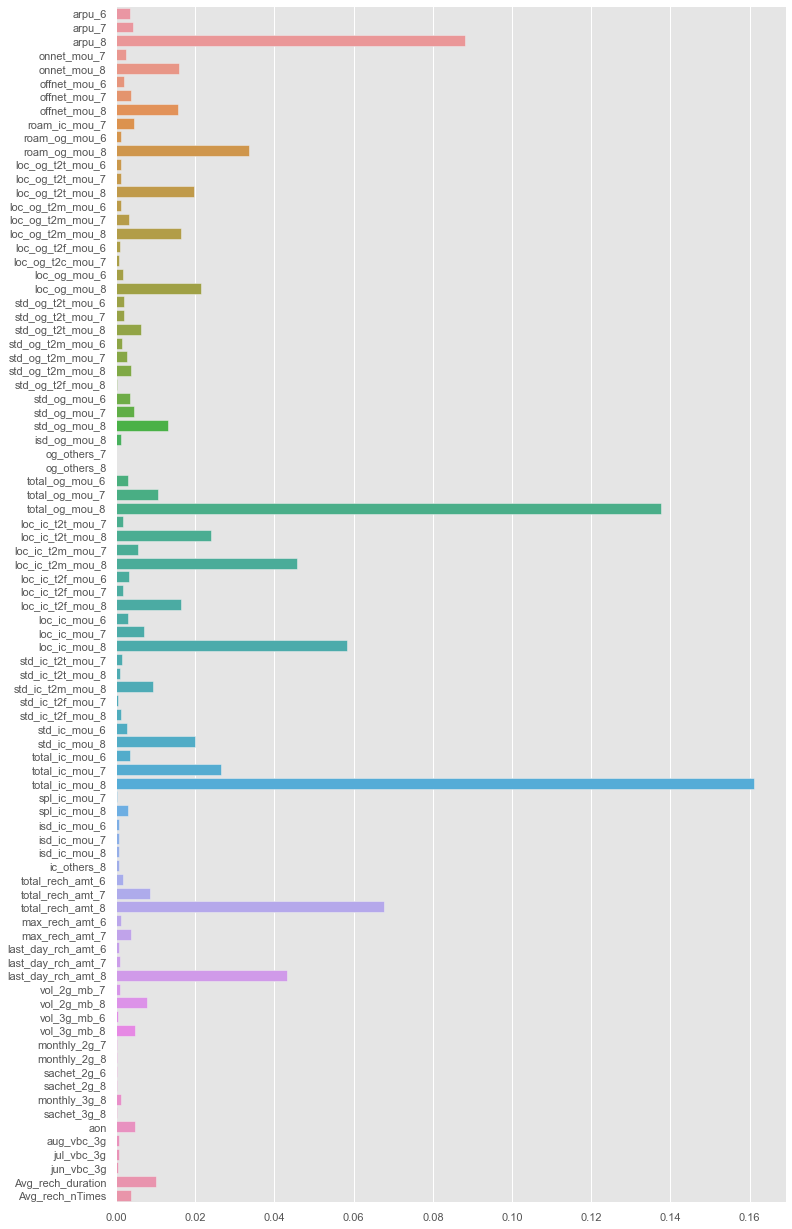

In [20]:
importance=rfc.feature_importances_
l= dict(zip(train_x_scaled_1.columns, importance))

plt.figure(figsize=(12,22))

sn.barplot(y=train_x_scaled_1.columns, x=importance)
plt.show()

['loc_ic_t2t_mou_8', 'total_ic_mou_7', 'roam_og_mou_8', 'last_day_rch_amt_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_rech_amt_8', 'arpu_8', 'total_og_mou_8', 'total_ic_mou_8']


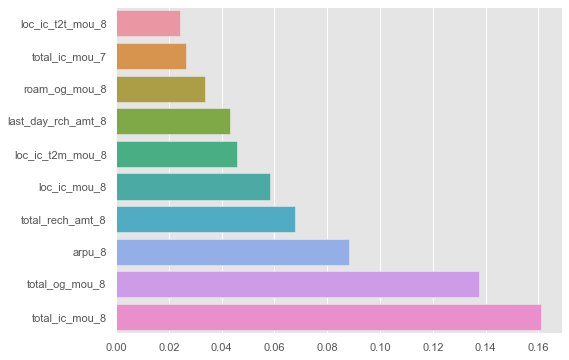

In [56]:

top_10_cols={}
top_10= sorted(importance)[-10:]
for i in top_10:
    for j,k in l.items():
        if i==k:
            top_10_cols[j]= i
a=list(top_10_cols.keys())
b=list(top_10_cols.values())
print(a)
plt.figure(figsize=(8,6))
sn.barplot(y=a,x=b)
plt.show()

## XGBClassifier

In [22]:
params= {
    'max_depth':[2,3,5,7],
    'n_estimators':[10,30,50]
    }

xgbc= xgb.XGBClassifier(random_state=42)

rcv_xgb= RandomizedSearchCV(xgbc,params,n_iter=10,scoring='accuracy',n_jobs=-1, cv=3,random_state=42)
result= rcv_xgb.fit(train_x_scaled_1,train_y)

print('best_score', result.best_score_)
print('best params', result.best_params_)

cv= cross_val_score(result,train_x_scaled_1,train_y,cv=3,scoring='roc_auc', n_jobs=-1)
print('Score with Roc_auc',cv)

[20:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best_score 0.9420941332702005
best params {'n_estimators': 50, 'max_depth': 5}
Score with Roc_auc [0.93862002 0.94071747 0.93819655]


In [48]:
xgbc1= xgb.XGBClassifier(n_estimators= 10, max_depth= 5, random_state=42,n_jobs=-1)
xgbc1= xgbc1.fit(train_x_scaled_1, train_y)

test_x_scaled_1= test_x_scaled[train_x_scaled_1.columns]

y_pred_val= xgbc1.predict(test_x_scaled_1)
print(classification_report(y_pred_val,test_y))
print('roc_auc_score: ', roc_auc_score(y_pred_val,test_y))
print('accuracy: ', accuracy_score(y_pred_val,test_y))
print('Recall: ', accuracy_score(y_pred_val,test_y))

[21:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16021
           1       0.64      0.77      0.70      1479

    accuracy                           0.94     17500
   macro avg       0.81      0.87      0.83     17500
weighted avg       0.95      0.94      0.95     17500

roc_auc_score:  0.8650472446597411
accuracy:  0.9433714285714285
Recall:  0.9433714285714285


Feature Importance Using XGB

Index(['total_ic_mou_8', 'arpu_8', 'roam_og_mou_8', 'loc_ic_mou_8',
       'loc_ic_t2f_mou_8', 'loc_og_mou_8', 'vol_2g_mb_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'vol_3g_mb_8'],
      dtype='object')


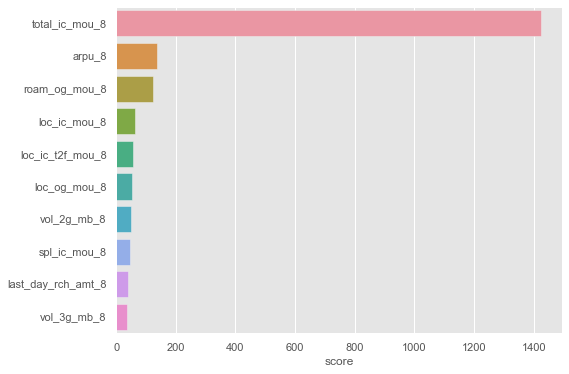

In [55]:
feature_imp= xgbc1.get_booster().get_score(importance_type='gain')
keys = list(feature_imp.keys())
values = list(feature_imp.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
top_10_xgb=data.head(10)
print(top_10_xgb.index)
plt.figure(figsize=(8,6))
sn.barplot(y=top_10_xgb.index, x=top_10_xgb['score'])
plt.show()

The top 5 Factors comes out to be:

1. total minutes usage in incoming voice calls/ outgoing voice calls for August month. if a person is using an operator heavily for voice calls then he/she is unlikely to churn

2. Average revenue per user in the August month. if there is a decreement in the revenue then it's more likely to churn

3. If a person is coming as roaming during outgoing calls, it is playing a significant role in  churn prediction.

4. local calls within same telecom circle- incoming calls- month 8 feature is also significantly impacting the churn probability. Higher usability lower churn probability

5. total recharge amount in the august month- if a person has recharged for very less amoount (just fior mainitaing minimum call balance), then it's likely a customer is likely to chrun or already have switched to another netwrok.

***Some other factors are:


6. 'loc_ic_t2f_mou_8'---minutes usage for local incoming calls to fixed lines in August, 
7. 'vol_2g_mb_8'----2g data volume usage in August, 
8. 'spl_ic_mou_8'---minute of usage for special incoming calls in August 
9. 'last_day_rch_amt_8'---Last day of recharge in August , 
10. 'vol_3g_mb_8'---3g data colume usage in August ,
11. 'total_ic_mou_7'---total incoming voica calls minutes in July, 
12. 'loc_ic_t2m_mou_8---minutes usage in local incoming calls from other operator on mobile '
 

# Predictions on Test Set

In [57]:
telecom_test= pd.read_csv('test.csv')

In [58]:
telecom_test_backup= telecom_test.copy()

In [59]:
telecom_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [160]:
telecom_test.shape

(30000, 171)

In [161]:
telecom_test.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.

### Data Cleaning and Preprocessing -similar to train set

In [60]:
telecom_test=telecom_test.set_index('id')

#dropping circle id as the datset is all about 109 circle.
telecom_test.drop(columns= ['circle_id'], inplace=True)

Date-Time Columns

In [61]:
m1= telecom_test['date_of_last_rech_6'].mode()[0]
m2= telecom_test['date_of_last_rech_7'].mode()[0]
m3= telecom_test['date_of_last_rech_8'].mode()[0]

telecom_test['date_of_last_rech_6']= telecom_test['date_of_last_rech_6'].fillna(m1)
telecom_test['date_of_last_rech_7']= telecom_test['date_of_last_rech_7'].fillna(m2)
telecom_test['date_of_last_rech_8']= telecom_test['date_of_last_rech_8'].fillna(m3)



telecom_test['date_of_last_rech_6']= pd.to_datetime(telecom_test['date_of_last_rech_6'])
telecom_test['date_of_last_rech_7']= pd.to_datetime(telecom_test['date_of_last_rech_7'])
telecom_test['date_of_last_rech_8']= pd.to_datetime(telecom_test['date_of_last_rech_8'])

a= telecom_test['date_of_last_rech_8'] - telecom_test['date_of_last_rech_7']
b= telecom_test['date_of_last_rech_7'] - telecom_test['date_of_last_rech_6']
telecom_test['Avg_rech_duration']= (a+b)/2

telecom_test['Avg_rech_duration']= pd.to_timedelta(telecom_test['Avg_rech_duration']).dt.days

telecom_test.drop(columns=['date_of_last_rech_8', 'date_of_last_rech_6','date_of_last_rech_7'],inplace=True)


In [164]:
telecom_test.shape

(30000, 167)

In [62]:
telecom_test['Avg_rech_nTimes']=(telecom_test['total_rech_num_6'] + telecom_test['total_rech_num_7'] + telecom_test['total_rech_num_8'])/3
telecom_test['Avg_rech_nTimes']= round(telecom_test['Avg_rech_nTimes'],2)
telecom_test.drop(columns= ['total_rech_num_6' ,'total_rech_num_7' ,'total_rech_num_8'],inplace=True)

In [166]:
telecom_test.shape

(30000, 165)

In [63]:
telecom_test= telecom_test[train_x_scaled.columns]

In [170]:
telecom_test.shape

(30000, 123)

## Missing value imputation, Outlier Response, Standardising

In [65]:
for i in telecom_test.columns:
    telecom_test[i]= telecom_test[i].fillna(telecom_test[i].median())

def cap_outliers(array, k=3):
#     array= telecom[x]
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

telecom_test=telecom_test.apply(cap_outliers,axis=0)

In [66]:
telecom_test_scaled= rb.transform(telecom_test)
telecom_test_scaled= pd.DataFrame(telecom_test_scaled, columns= telecom_test.columns)
telecom_test_scaled.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_duration,Avg_rech_nTimes
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.020575,-0.016194,-0.014986,-0.044296,-0.041908,-0.039112,-0.040254,-0.034173,-0.031801,-0.046166,-0.044135,-0.029651,-0.074597,-0.065730,-0.061086,-0.040362,-0.038788,-0.039921,-0.026156,-0.018834,-0.018039,-0.046048,-0.040235,-0.043739,-0.059494,-0.052347,-0.047352,-0.022103,-0.016002,-0.015947,-0.058063,-0.055946,-0.053423,-0.055689,-0.057245,-0.058218,-0.066497,-0.053476,-0.059174,-0.047003,-0.045625,-0.045562,-0.060394,-0.059800,-0.059485,-0.060511,-0.049812,-0.044614,-0.073559,-0.029210,-0.036362,-0.030849,-0.027130,-0.026052,-0.048194,-0.045778,-0.049779,-0.021732,-0.019127,-0.027752,-0.048034,-0.045686,-0.049

In [67]:
telecom_test_scaled_1= telecom_test_scaled[train_x_scaled_1.columns]

In [178]:
telecom_test_scaled_1.shape

(30000, 105)

## Prediction

In [68]:
churn= xgbc1.predict(telecom_test_scaled_1)
churn

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [69]:
output= pd.DataFrame()
output['id']= telecom_test_backup['id']
output['churn_probability']= churn
output.shape

(30000, 2)

In [70]:
output.to_csv('TelecomSubmission20OctV2.csv', index=False)

In [73]:
print('Churn rate in Test Dataset', (churn.sum())/30000)

Churn rate in Test Dataset 0.08406666666666666


# Observations and Inferences

1. Churn rate in the test.csv is coming approx 0.084 which is almost similar to the one we received in Train.csv (0.10 approx)


2. As a final model we have used XGBClassifier as it was performing the best among the models we picked (logistic regression also worked well, that can be chosen as well). The evaluation metrics are:
    For Train set in train.csv-> Accuracy: 94% approx  ; ROC_AUC score: 93 % Approx
    For Val Set in train.csv-> roc_auc_score:  87 %  ;Accuracy:  0.94  ;Recall:  0.94
    
    
3. The top 5 Factors comes out to be:

    a. total minutes usage in incoming voice calls/ outgoing voice calls for August month. if a person is using an operator heavily for voice calls then he/she is unlikely to churn

    b. Average revenue per user in the August month. if there is a decreement in the revenue then it's more likely to churn

    c. If a person is coming as roaming during outgoing calls, it is playing a significant role in  churn prediction.

    d. local calls within same telecom circle- incoming calls- month 8 feature is also significantly impacting the churn probability. Higher usability lower churn probability

    e. total recharge amount in the august month- if a person has recharged for very less amoount (just fior mainitaing minimum call balance), then it's likely a customer is likely to chrun or already have switched to another netwrok.

    ***Some other factors are:


    f. 'loc_ic_t2f_mou_8'---minutes usage for local incoming calls to fixed lines in August, 
    g. 'vol_2g_mb_8'----2g data volume usage in August, 
    h. 'spl_ic_mou_8'---minute of usage for special incoming calls in August 
    i. 'last_day_rch_amt_8'---Last day of recharge in August , 
    j. 'vol_3g_mb_8'---3g data colume usage in August ,
    k. 'total_ic_mou_7'---total incoming voica calls minutes in July, 
    l. 'loc_ic_t2m_mou_8---minutes usage in local incoming calls from other operator on mobile '
    

4.  As the evaluation metric, we have focussed on roc_auc (which will bring balanced tradeoff between recall and precision and accuracy). We can focus only on accuracy when we have a balanced dataset in terms of churn rate ie, 50-50%. Although When the business requirement is there to correctly predict most of the churns then we should try to maximise Precision. while when we cannot risk of incorrectly identifying a customer to churn-when he is not, we should try to optimize Recall. Optimizing recall will reduce our tendency for missclassification and increase for correct churn prediction


5. Some Strategies to prevent churning:

    a. Identify the probable customers who can churn based by monitoring the above explained factors , and provide them with additional benefits like lower prices range net packs, lower priced range recharges, additional discounts on company's associated partners (like free subscription on wynk,netflix,spotify,etc)
    b. Improvement in services by monitoring the factors of data (3g/2g) usage,installing more towers if connectivity issue are there.
    c. Frequent customer feedback with customers via telephone/msg , and work on them.

 